# Directory setup & Access

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

In [ ]:
paper_name = "new_mnist"

In [ ]:
dataset = 'new_mnist'

In [ ]:
# make directories if they do not exist
for paper_name_here in ["new_mnist","test13","gpSVHN"]:
  make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}/model_features/")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}/concatenated_model_features/")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}/model_checkpoints/")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}/model_history/")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}/model_finals/")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}/gp_collab/")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}/model_predictions/")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}/model_ccs/")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}/summary_results/")
  make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name_here}/summary_results/temp/")


In [ ]:
%pip install ipython-autotime

In [ ]:
%load_ext autotime

time: 80.9 µs (started: 2022-04-04 09:02:55 +00:00)


In [ ]:
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE


time: 1.96 s (started: 2022-04-04 09:02:55 +00:00)


In [ ]:
# Set up the imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Concatenate, Add, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import  Dense, Flatten, Activation, Dropout, Embedding, Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Concatenate, BatchNormalization, GaussianNoise, AveragePooling2D
from tensorflow.keras.layers import LSTM, TimeDistributed, Permute, Reshape, Lambda, RepeatVector, Input, Multiply, SimpleRNN, GRU, LeakyReLU, Add
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.summary import create_file_writer

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 33.8 ms (started: 2022-04-04 09:02:57 +00:00)


In [ ]:
import re
import os

def dir_has_file_with_regex(dir_name, regex_string):
  filenames = [ f"{dir_name}/{dir_entry.name}" for dir_entry in os.scandir(dir_name) if os.path.isfile(f"{dir_name}/{dir_entry.name}") ]   
  filenames = [ fn for fn in filenames if re.match(regex_string, fn, re.IGNORECASE) ]
  return filenames


time: 2.46 ms (started: 2022-04-04 09:02:57 +00:00)


In [ ]:
import re
import os

def dir_has_dir_with_regex(dir_name, regex_string):
  dirnames = [ f"{dir_name}/{dir_entry.name}" for dir_entry in os.scandir(dir_name) if os.path.isdir(f"{dir_name}/{dir_entry.name}") ]   
  dirnames = [ fn for fn in dirnames if re.match(regex_string, fn, re.IGNORECASE) ]
  return dirnames


time: 2.52 ms (started: 2022-04-04 09:02:57 +00:00)


# data load and data util funcs

In [ ]:
# Run this cell to load the dataset 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X /= 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

time: 44.3 s (started: 2022-04-04 09:03:03 +00:00)


In [ ]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    idx = X.sample(5).index
    for i, (img, y) in enumerate(zip(X.loc[idx].to_numpy().reshape(5, 28, 28), y.loc[idx])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

time: 3.2 ms (started: 2022-04-04 09:03:47 +00:00)


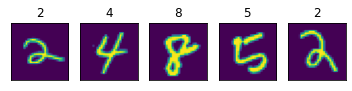

time: 197 ms (started: 2022-04-04 09:03:47 +00:00)


In [ ]:
plot_example(X_train, y_train)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Rescale the images from [0,255] to the [0.0,1.0] range.
X_train, X_test = X_train[..., np.newaxis]/255.0, X_test[..., np.newaxis]/255.0
# X_validation = X_validation[..., np.newaxis]/255.0

# print("Number of original training examples:", len(x_train))
# print("Number of original test examples:", len(x_test))

# print( X_train.shape, X_validation.shape, X_test.shape)
print( X_train.shape, X_validation.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (6300, 784)
time: 727 ms (started: 2022-04-04 09:03:47 +00:00)


In [ ]:
# np.unique(y_train.head(100))
paper_name

'new_mnist'

time: 4.13 ms (started: 2022-04-04 09:03:48 +00:00)


In [ ]:
train_data = X_train
# validation_data = X_validation
test_data = X_test
train_targets = y_train
# validation_targets = y_validation
test_targets = y_test

time: 1.37 ms (started: 2022-04-04 09:03:48 +00:00)


In [ ]:
from pprint import pprint as pp
pp(train_data.shape)
pp(test_data.shape)
# pp(validation_data.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
time: 1.37 ms (started: 2022-04-04 09:03:48 +00:00)


In [ ]:
# extracts the layer from a model using the name
def get_layer_by_name(layers, name, return_first=True):
    matching_named_layers = [l for l in layers if l.name == name]
    if not matching_named_layers:
        return None
    return matching_named_layers[0] if return_first else matching_named_layers


time: 1.95 ms (started: 2022-04-04 09:03:48 +00:00)


In [ ]:
# plotting utilities for the history of the fit
def plot_history(history):
    acc_keys = [k for k in history.history.keys() if 'accuracy' in k]
    loss_keys = [k for k in history.history.keys() if not k in acc_keys]
    for k, v in history.history.items():
        if k in acc_keys:
            plt.figure(1)
            plt.plot(v)
        else:
            plt.figure(2)
            plt.plot(v)
    plt.figure(1)
    plt.title('Accuracy vs. epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(acc_keys, loc='lower right')
    plt.figure(2)
    plt.title('Loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loss_keys, loc='upper right')
    plt.show()

def plot_history_df(history):
    acc_keys = [k for k in history.columns.values if 'accuracy' in k]
    loss_keys = [k for k in history.columns.values if not k in acc_keys and not k in ['epoch']]
    for k, v in history.items():
        if k in acc_keys:
            plt.figure(1)
            plt.plot(v)
        if k in loss_keys:
            plt.figure(2)
            plt.plot(v)
    plt.figure(1)
    plt.title('Accuracy vs. epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(acc_keys, loc='lower right')
    plt.figure(2)
    plt.title('Loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loss_keys, loc='upper right')
    plt.show()   


time: 28 ms (started: 2022-04-04 09:03:48 +00:00)


In [ ]:
import timeit

time: 642 µs (started: 2022-04-04 09:03:48 +00:00)


In [ ]:
LEARNING_RATE_EXP_DECAY = 0.6
LEARNING_RATE = 0.01

time: 721 µs (started: 2022-04-04 09:03:48 +00:00)


In [ ]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

time: 1.38 ms (started: 2022-04-04 09:03:48 +00:00)


In [ ]:
train_targets_one_hot = get_one_hot(train_targets, len(np.unique(np.array(train_targets))) )
test_targets_one_hot = get_one_hot(test_targets, len(np.unique(np.array(train_targets))) )

time: 7.37 ms (started: 2022-04-04 09:03:48 +00:00)


In [ ]:
from pprint import pprint as pp
from operator import mul
from functools import reduce
train_data_flat = tf.reshape(tf.convert_to_tensor(train_data, dtype=tf.float32), 
                              [train_data.shape[0], reduce(mul, train_data.shape[1:-1], 1)])
test_data_flat = tf.reshape(tf.convert_to_tensor(test_data, dtype=tf.float32), 
                              [test_data.shape[0], reduce(mul, test_data.shape[1:-1], 1)])

# train_data.dtype

time: 2.17 s (started: 2022-04-04 09:03:48 +00:00)


# Basic model run and fit & result processing

A function that will take a model construction function (with _model_name_ and _input_shape_ arguments), train and fit it using the supplied data and callbacks. The _kwargs_ are supplied to the model fit function.

In [ ]:
from tensorflow.keras.callbacks import CSVLogger
import datetime

def compile_and_fit_model_basic(  model_func,
                                  model_name,
                                  X_train,
                                  Y_train,
                                  save_max_epoch=True,
                                  save_final=False,
                                  patience_count = None,
                                  early_stopping_obs = None,
                                  log_history = True,
                                  verbose_level = 0,
                                  **kwargs):
    m = None
    if isinstance(model_func, tf.keras.models.Model):
        m = model_func
        m._name = model_name
    else:
        m = model_func(model_name)
      
    if early_stopping_obs is not None:
      if 'validation_data' not in kwargs.keys() and 'val_' in early_stopping_obs:
          early_stopping_obs = early_stopping_obs.replace('val_','')

    callbacks_used = []
    if "callbacks_to_add" in kwargs.keys():
      callbacks_used = kwargs["callbacks_to_add"].copy()
      kwargs.pop("callbacks_to_add")
    if save_max_epoch:
        callbacks_used.append(ModelCheckpoint(f'/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{m.name}' + '_model_{epoch:03d}_{accuracy:0.3f}',
                                              save_weights_only=False,
                                              monitor = early_stopping_obs,
                                              mode='max',
                                              save_best_only=True))
    if patience_count is not None and early_stopping_obs is not None:
        callbacks_used.append(tf.keras.callbacks.EarlyStopping(monitor=early_stopping_obs, patience=patience_count))

    if log_history:
        callbacks_used.append(tf.keras.callbacks.CSVLogger(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/history_log_{model_name}_{datetime.date.today().strftime('%Y%m%d')}.csv", append=True))

    m.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

    # m.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    #           optimizer=tf.keras.optimizers.Adam(), 
    #           metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    
# model.compile(optimizer='adam', # learning rate will be set by LearningRateScheduler
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

    history = m.fit(X_train, Y_train, callbacks=callbacks_used, verbose=verbose_level, **kwargs)
    if save_final:
        # make_dir_if_not_exist(model_name)
        m.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{m.name}_saved_model_after_fit")  # Save the model
    return (m, history)

time: 29.8 ms (started: 2022-04-04 09:03:50 +00:00)


Some functions to get scores on the results

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import re

def get_confusion_matrix_classification(model, X, Y_true):
    y_pred = model.predict(X)
    y_true = np.apply_along_axis(np.argmax, 1, Y_true)
    y_pred = np.apply_along_axis(np.argmax, 1, y_pred)
    return (confusion_matrix(y_true, y_pred), y_pred, y_true)

def construct_confusion_matrix(X, Y_true, Y_pred):
    y_true = Y_true
    y_pred = np.apply_along_axis(np.argmax, 1, Y_pred)
    return (confusion_matrix(y_true, y_pred), y_pred, y_true)

def pr_rc_f1_acc_from_supplied(y_pred, y_true):  
    pr, rc, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")   
    acc = accuracy_score(y_true, y_pred)
    return pr, rc, f1, acc


time: 7.69 ms (started: 2022-04-04 09:03:50 +00:00)


In [ ]:
# pp(train_data.shape)
# pp(reduce(mul, train_data.shape[1:-1],1))
# train_data_flat = tf.reshape(tf.convert_to_tensor(train_data, dtype=tf.float32), (train_data.shape[0], reduce(mul, train_data.shape[1:-1], 1.0) ))
# pp(train_data_flat.shape)

time: 774 µs (started: 2022-04-04 09:03:50 +00:00)


# MNIST base CNN full data set gives 98.07% average test accuracy

https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/01_MNIST_TPU_Keras.ipynb#scrollTo=56y8UNFQIVwj

In [ ]:
def mnist_baseCNN_model(model_name):
    model = tf.keras.Sequential(
      [
        tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1), name="image"),

        tf.keras.layers.Conv2D(filters=12, kernel_size=3, padding='same', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(scale=False, center=True), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=24, kernel_size=6, padding='same', use_bias=False, strides=2),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Conv2D(filters=32, kernel_size=6, padding='same', use_bias=False, strides=2),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, use_bias=False, name="LD1"),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.4), # Dropout on dense layer only

        tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")
      ])

    model._name = model_name
     # Going back and forth between TPU and host is expensive. Better to run 128 batches on the TPU before reporting back.
    return model



time: 19.7 ms (started: 2022-03-31 10:31:59 +00:00)


In [ ]:
def mnist_baseCNN_rotate_model(model_name):
    model = tf.keras.Sequential(
      [
        # tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1), name="image"),
        tf.keras.layers.RandomRotation(20),  
        tf.keras.layers.Conv2D(filters=12, kernel_size=3, padding='same', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(scale=False, center=True), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=24, kernel_size=6, padding='same', use_bias=False, strides=2),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Conv2D(filters=32, kernel_size=6, padding='same', use_bias=False, strides=2),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, use_bias=False, name="LD1"),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.4), # Dropout on dense layer only

        tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")
      ])

    model._name = model_name
     # Going back and forth between TPU and host is expensive. Better to run 128 batches on the TPU before reporting back.
    return model

time: 17.4 ms (started: 2022-03-31 10:31:59 +00:00)


In [ ]:
pp(train_data.shape)
pp(train_targets.shape)

len(np.unique(np.array(train_targets)))

(60000, 28, 28, 1)
(60000,)


10

time: 10.4 ms (started: 2022-03-31 10:31:59 +00:00)


In [ ]:
EPOCHS = 50
BATCH_SIZE = 64
NUM_OF_MODELS = 5
steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+1 for i in range(NUM_OF_MODELS)]:
  start_time = timeit.default_timer()
  m1, h1 = compile_and_fit_model_basic( mnist_baseCNN_rotate_model,  
                    f"FULLCONVNNROT20_MNIST_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
                    # train_data[0,:,:,:].shape, 
                    train_data, 
                    train_targets_one_hot,
                    save_max_epoch=False,
                    save_final=True,
                    patience_count = 35,
                    # early_stopping_obs = 'val_sparse_categorical_accuracy',
                    log_history = True,                             
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    class_weight=None, 
                    verbose_level = 0,
                    # validation_data=(validation_data_grey, validation_targets)
                    callbacks_to_add =[lr_decay]
                    )
  print(timeit.default_timer()-start_time)
# # /content/drive/MyDrive/data_papers/gpSVHN/model_finals/DNN_A_6_20210923210545_saved_model_after_fit/assets
# plot_history(h1)


Steps per epoch:  937
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLCONVNNROT20_MNIST_1_20220329193743_saved_model_after_fit/assets
266.5653722019997
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLCONVNNROT20_MNIST_2_20220329194210_saved_model_after_fit/assets
265.3414109709993
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLCONVNNROT20_MNIST_3_20220329194635_saved_model_after_fit/assets
213.76555213100073
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLCONVNNROT20_MNIST_4_20220329195009_saved_model_after_fit/assets
219.6471983070005
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLCONVNNROT20_MNIST_5_20220329195348_saved_model_after_fit/assets
209.81064961200173
time: 19min 35s (started: 2022-03-29 19:37:43 +00:00)


In [ ]:
cnn_id = "FULLCONVNNROT20_MNIST_"

time: 958 µs (started: 2022-04-03 13:15:55 +00:00)


In [ ]:
# m.predict(validation_dataset)
# m.predict(test_dataset)
# m.evaluate(test_data, test_targets_one_hot)
pp(test_data.shape)
pp(test_targets_one_hot.shape)
loaded_model = tf.keras.models.load_model(dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{cnn_id}.*")[0])
loaded_eval = loaded_model.evaluate(test_data, test_targets_one_hot)


(10000, 28, 28, 1)
(10000, 10)
313/313 [==============================] - 12s 4ms/step - loss: 0.0660 - categorical_accuracy: 0.9802
time: 25.8 s (started: 2022-04-03 13:17:47 +00:00)


In [ ]:
# average test accuracy

cnn_id = "FULLCONVNNROT20_MNIST_"

test_accs = []
for model_dir in dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{cnn_id}.*"):
  loaded_model = tf.keras.models.load_model(model_dir)
  test_accs.append(loaded_model.evaluate(test_data, test_targets_one_hot)[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.0595 - categorical_accuracy: 0.9799
time: 28.7 s (started: 2022-04-03 13:24:07 +00:00)


In [ ]:
np.mean(test_accs)


0.9807799935340882

time: 11.1 ms (started: 2022-04-03 13:24:59 +00:00)


# MNIST base DNN full data set

In [1]:
def get_mnist_dnn(model_name, input_size = 784, hidden_neurons = 400, classes =10):
  model = Sequential()     
  # model.add(tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(input_size,), name="image"))
  model.add(Dense(hidden_neurons, input_dim=input_size, activation='relu', name="LD1")) 
  model.add(Dense(classes, input_dim=hidden_neurons, activation='softmax', name="SFTMX")) 
  model._name = model_name
  return model

In [ ]:
train_data.shape

(60000, 28, 28, 1)

time: 4.55 ms (started: 2022-03-31 10:31:59 +00:00)


In [ ]:
EPOCHS = 50
BATCH_SIZE = 64
NUM_OF_MODELS = 5
steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+1 for i in range(NUM_OF_MODELS)]:
  start_time = timeit.default_timer()
  m1, h1 = compile_and_fit_model_basic( get_mnist_dnn,  
                    f"FULLDENSENN_MNIST_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
                    # train_data[0,:,:,:].shape, 
                    train_data_flat, 
                    train_targets_one_hot,
                    save_max_epoch=False,
                    save_final=True,
                    patience_count = 35,
                    # early_stopping_obs = 'val_sparse_categorical_accuracy',
                    log_history = True,                             
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    class_weight=None, 
                    verbose_level = 0,
                    # validation_data=(validation_data_grey, validation_targets)
                    callbacks_to_add =[lr_decay]
                    )
  print(timeit.default_timer()-start_time)
# # /content/drive/MyDrive/data_papers/gpSVHN/model_finals/DNN_A_6_20210923210545_saved_model_after_fit/assets
# plot_history(h1)


Steps per epoch:  937


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLDENSENN_MNIST_1_20220330120647_saved_model_after_fit/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLDENSENN_MNIST_1_20220330120647_saved_model_after_fit/assets


122.09216531200036


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLDENSENN_MNIST_2_20220330120849_saved_model_after_fit/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLDENSENN_MNIST_2_20220330120849_saved_model_after_fit/assets


142.7602812240002


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLDENSENN_MNIST_3_20220330121112_saved_model_after_fit/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLDENSENN_MNIST_3_20220330121112_saved_model_after_fit/assets


142.7181842609998


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLDENSENN_MNIST_4_20220330121334_saved_model_after_fit/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLDENSENN_MNIST_4_20220330121334_saved_model_after_fit/assets


127.87309429300058


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLDENSENN_MNIST_5_20220330121542_saved_model_after_fit/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/FULLDENSENN_MNIST_5_20220330121542_saved_model_after_fit/assets


108.62083218399948
time: 10min 44s (started: 2022-03-30 12:06:47 +00:00)


# Function for writing the features and getting (un)batched data sets to be used

A function that given a model or model directory create a new model up to the _layer_name_, then write the features matching the supplied _X_ and _Y_ as numpy arrays to google drive.

In [ ]:
# note the removal of the Y feature writing...
def write_features_from_models(
        model_entry,
        layer_name,
        data_set_input,
        normalize_X_func=None,
        dataset_id = "NA",
        **kwargs):
  
    model_here = None
    if isinstance(model_entry, tf.keras.models.Model):
        model_here = model_entry
        model_file_name = model_here.name
    else:
        model_here = tf.keras.models.load_model(model_entry,**kwargs) 

    features_model = Model(model_here.input,
                            get_layer_by_name(model_here.layers, layer_name).output)
    if normalize_X_func is None:
        X_new = np.array(features_model.predict(data_set_input), dtype='float64')
    else:
        X_new = np.array(normalize_X_func(features_model.predict(data_set_input)), dtype='float64')

    np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/{model_here.name}_features_{layer_name}_{dataset_id}_X", X_new, 
               allow_pickle=True, 
               fix_imports=True)
    

time: 7.04 ms (started: 2022-04-04 09:03:50 +00:00)


# Write features for CNN and DNN models

In [ ]:
# save features CNN
# write training features
check_model_string = "FULLCONVNNROT20_MNIST_"
not_check_model_string = ["arallel","Collab_"]
for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/"):
  if os.path.isdir(dir_entry):
    if check_model_string in str(dir_entry) and all([ (not ncs in dir_entry.name) for ncs in not_check_model_string]):
      # if not dir_has_file_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features",f".*{dir_entry.name.replace('_saved_model_after_fit','')}.*_features_DRP1_Train.*$"):
      print(dir_entry.name)
      write_features_from_models(
            f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
            "LD1",
            train_data,
            normalize_X_func=None,
            dataset_id = "Train")
      write_features_from_models(
            f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
            "SFTMX",
            train_data,
            normalize_X_func=None,
            dataset_id = "Train")
          
        

FULLCONVNNROT20_MNIST_1_20220329193743_saved_model_after_fit
FULLCONVNNROT20_MNIST_2_20220329194210_saved_model_after_fit


FULLCONVNNROT20_MNIST_3_20220329194635_saved_model_after_fit
FULLCONVNNROT20_MNIST_4_20220329195009_saved_model_after_fit


FULLCONVNNROT20_MNIST_5_20220329195348_saved_model_after_fit
time: 1min 19s (started: 2022-03-30 12:21:32 +00:00)


In [ ]:
# save features CNN
# write test features
check_model_string = "FULLCONVNNROT20_MNIST_"
not_check_model_string = ["arallel","Collab_"]
for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/"):
  if os.path.isdir(dir_entry):
    if check_model_string in str(dir_entry) and all([ (not ncs in dir_entry.name) for ncs in not_check_model_string]):
      # if not dir_has_file_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features",f".*{dir_entry.name.replace('_saved_model_after_fit','')}.*_features_DRP1_Test.*$"):
      print(dir_entry.name)
      write_features_from_models(
            f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
            "LD1",
            test_data,
            normalize_X_func=None,
            dataset_id = "Test")
      write_features_from_models(
            f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
            "SFTMX",
            test_data,
            normalize_X_func=None,
            dataset_id = "Test")


FULLCONVNNROT20_MNIST_1_20220329193743_saved_model_after_fit


FULLCONVNNROT20_MNIST_2_20220329194210_saved_model_after_fit
FULLCONVNNROT20_MNIST_3_20220329194635_saved_model_after_fit


FULLCONVNNROT20_MNIST_4_20220329195009_saved_model_after_fit


FULLCONVNNROT20_MNIST_5_20220329195348_saved_model_after_fit
time: 18 s (started: 2022-03-30 12:27:37 +00:00)


In [ ]:
# save features DNN
# write training & test features
                   
check_model_string = "FULLDENSENN_MNIST_"
not_check_model_string = ["arallel","Collab_"]
for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/"):
  if os.path.isdir(dir_entry):
    if check_model_string in str(dir_entry) and all([ (not ncs in dir_entry.name) for ncs in not_check_model_string]):
      # if not dir_has_file_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features",f".*{dir_entry.name.replace('_saved_model_after_fit','')}.*_features_DRP1_Train.*$"):
      print(dir_entry.name)
      write_features_from_models(
            f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
            "LD1",
            train_data_flat,
            normalize_X_func=None,
            dataset_id = "Train")
      write_features_from_models(
            f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
            "SFTMX",
            train_data_flat,
            normalize_X_func=None,
            dataset_id = "Train")
      write_features_from_models(
            f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
            "LD1",
            test_data_flat,
            normalize_X_func=None,
            dataset_id = "Test")
      write_features_from_models(
            f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
            "SFTMX",
            test_data_flat,
            normalize_X_func=None,
            dataset_id = "Test")

FULLDENSENN_MNIST_1_20220330120647_saved_model_after_fit
FULLDENSENN_MNIST_2_20220330120849_saved_model_after_fit


FULLDENSENN_MNIST_3_20220330121112_saved_model_after_fit
FULLDENSENN_MNIST_4_20220330121334_saved_model_after_fit
FULLDENSENN_MNIST_5_20220330121542_saved_model_after_fit
time: 43.9 s (started: 2022-03-30 12:38:34 +00:00)


# Identifiers for CNN/DNN files

In [ ]:
acceptable_string_grabs = [ "FULLCONVNNROT20_", "FULLDENSENN_"]
not_check_model_string = ["arallel","Collab_"]

model_dirs = [  f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}" 
                for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/") 
                if os.path.isdir(dir_entry) and any(xs in dir_entry.name for xs in acceptable_string_grabs) ]
dnn_model_dirs = [ s for s in model_dirs if "DENSENN" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 
cnn_model_dirs = [ s for s in model_dirs if "CONVNN" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 

model_features_files = [  f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/{file_entry.name}" 
                for file_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/") 
                if os.path.isfile(file_entry) and any(xs in file_entry.name for xs in acceptable_string_grabs) ]

dnn_features_files = [ s for s in model_features_files if "DENSENN" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 
cnn_features_files = [ s for s in model_features_files if "CONVNN" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 

dnn_identifier = acceptable_string_grabs[1]

cnn_identifier = acceptable_string_grabs[0]

def avgfilter_ensemble_predictions(y_pred_ms, xtest):
  y_preds_ens_prb = np.apply_along_axis(np.mean, 0, y_pred_ms)
  y_preds_ens_idx = np.apply_along_axis(np.argmax, 1, y_preds_ens_prb) 
  # y_preds_ens_idx = y_preds_ens_idx + 1
  return y_preds_ens_idx  


time: 40.6 ms (started: 2022-04-04 15:13:36 +00:00)


In [ ]:
acceptable_sota_string_grabs = [ "CNNEMASOTA", "CNNSOTA"]
not_check_model_string = ["arallel","Collab_"]

model_dirs = [  f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}" 
                for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/") 
                if os.path.isdir(dir_entry) and any(xs in dir_entry.name for xs in acceptable_sota_string_grabs) ]

cnnsota_model_dirs = [ s for s in model_dirs if "CNNSOTA" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 
cnnemasota_model_dirs = [ s for s in model_dirs if "CNNEMASOTA" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 

cnnanysota_model_features_files = [  f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/{file_entry.name}" 
                for file_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/") 
                if os.path.isfile(file_entry) and any(xs in file_entry.name for xs in acceptable_sota_string_grabs) ]

cnnsota_features_files = [ s for s in cnnanysota_model_features_files if "CNNSOTA" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 
cnnemasota_features_files = [ s for s in cnnanysota_model_features_files if "CNNEMASOTA" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 


time: 31.3 ms (started: 2022-04-04 15:13:36 +00:00)


In [ ]:
import random
import re

def get_base_patterns_for_string(features_files, search_string = "Validation", layer_name = "SFTMX", model_type = "DNN"):
  base_patterns_for_validations = []
  for ff in [ s for s in features_files if search_string in s]:
    # validation_search = re.search(f'^.*({model_type}.*_ID.*features_{layer_name}_{search_string})[0-9]+.*$', ff, re.IGNORECASE)
    # validation_search = re.search(f'^.*({model_type}.*features_{layer_name}_{search_string}).*$', ff, re.IGNORECASE)
    validation_search = re.search(f'^.*({model_type}.*features_{layer_name}).*$', ff, re.IGNORECASE)
    if validation_search:
        base_patterns_for_validations.append(validation_search.group(1))

  base_patterns_for_validations = sorted(list(set(base_patterns_for_validations)))
  return base_patterns_for_validations


time: 5.28 ms (started: 2022-04-04 15:13:36 +00:00)


In [ ]:
dnn_base_patterns_train = get_base_patterns_for_string(dnn_features_files, "Train", "SFTMX", "DENSENN")
dnn_base_patterns_test = get_base_patterns_for_string(dnn_features_files, "Test", "SFTMX", "DENSENN")
dnn_base_patterns_sftmx = list(set(dnn_base_patterns_train) &  set(dnn_base_patterns_test))

dnn_base_patterns_train = get_base_patterns_for_string(dnn_features_files, "Train", "LD1", "DENSENN")
dnn_base_patterns_test = get_base_patterns_for_string(dnn_features_files, "Test", "LD1", "DENSENN")
dnn_base_patterns_ld = list(set(dnn_base_patterns_train) & set(dnn_base_patterns_test))


time: 3.67 ms (started: 2022-04-04 15:13:36 +00:00)


In [ ]:
cnn_base_patterns_train_sftmx = get_base_patterns_for_string(cnn_features_files, "Train", "SFTMX", "CONVNN")
cnn_base_patterns_test_sftmx = get_base_patterns_for_string(cnn_features_files, "Test", "SFTMX", "CONVNN")
cnn_base_patterns_sftmx = list(set(cnn_base_patterns_train_sftmx) & set(cnn_base_patterns_test_sftmx))

cnn_base_patterns_train_ld = get_base_patterns_for_string(cnn_features_files, "Train", "LD1", "CONVNN")
cnn_base_patterns_test_ld = get_base_patterns_for_string(cnn_features_files, "Test", "LD1", "CONVNN")
cnn_base_patterns_ld = list(set(cnn_base_patterns_train_ld) & set(cnn_base_patterns_test_ld))

time: 4.23 ms (started: 2022-04-04 15:13:36 +00:00)


In [ ]:
cnnsotam3_base_patterns_train_sftmx = get_base_patterns_for_string(cnnsota_features_files, "Train", "SFTMX", "CNNSOTAM3")
cnnsotam3_base_patterns_test_sftmx = get_base_patterns_for_string(cnnsota_features_files, "Test", "SFTMX", "CNNSOTAM3")
cnnsotam3_base_patterns_sftmx = list(set(cnnsotam3_base_patterns_train_sftmx) & set(cnnsotam3_base_patterns_test_sftmx))

cnnsotam5_base_patterns_train_sftmx = get_base_patterns_for_string(cnnsota_features_files, "Train", "SFTMX", "CNNSOTAM5")
cnnsotam5_base_patterns_test_sftmx = get_base_patterns_for_string(cnnsota_features_files, "Test", "SFTMX", "CNNSOTAM5")
cnnsotam5_base_patterns_sftmx = list(set(cnnsotam5_base_patterns_train_sftmx) & set(cnnsotam5_base_patterns_test_sftmx))

cnnsotam7_base_patterns_train_sftmx = get_base_patterns_for_string(cnnsota_features_files, "Train", "SFTMX", "CNNSOTAM7")
cnnsotam7_base_patterns_test_sftmx = get_base_patterns_for_string(cnnsota_features_files, "Test", "SFTMX", "CNNSOTAM7")
cnnsotam7_base_patterns_sftmx = list(set(cnnsotam7_base_patterns_train_sftmx) & set(cnnsotam7_base_patterns_test_sftmx))


time: 6.2 ms (started: 2022-04-04 15:13:36 +00:00)


In [ ]:
cnnemasotam3_base_patterns_train_sftmx = get_base_patterns_for_string(cnnemasota_features_files, "Train", "SFTMX", "CNNEMASOTAM3")
cnnemasotam3_base_patterns_test_sftmx = get_base_patterns_for_string(cnnemasota_features_files, "Test", "SFTMX", "CNNEMASOTAM3")
cnnemasotam3_base_patterns_sftmx = list(set(cnnemasotam3_base_patterns_train_sftmx) & set(cnnemasotam3_base_patterns_test_sftmx))

cnnemasotam5_base_patterns_train_sftmx = get_base_patterns_for_string(cnnemasota_features_files, "Train", "SFTMX", "CNNEMASOTAM5")
cnnemasotam5_base_patterns_test_sftmx = get_base_patterns_for_string(cnnemasota_features_files, "Test", "SFTMX", "CNNEMASOTAM5")
cnnemasotam5_base_patterns_sftmx = list(set(cnnemasotam5_base_patterns_train_sftmx) & set(cnnemasotam5_base_patterns_test_sftmx))

cnnemasotam7_base_patterns_train_sftmx = get_base_patterns_for_string(cnnemasota_features_files, "Train", "SFTMX", "CNNEMASOTAM7")
cnnemasotam7_base_patterns_test_sftmx = get_base_patterns_for_string(cnnemasota_features_files, "Test", "SFTMX", "CNNEMASOTAM7")
cnnemasotam7_base_patterns_sftmx = list(set(cnnemasotam7_base_patterns_train_sftmx) & set(cnnemasotam7_base_patterns_test_sftmx))


time: 7.34 ms (started: 2022-04-04 15:13:36 +00:00)


In [ ]:
cnnsota_base_patterns_train_sftmx = get_base_patterns_for_string(cnnsota_features_files, "Train", "SFTMX", "CNNSOTA")
cnnsota_base_patterns_test_sftmx = get_base_patterns_for_string(cnnsota_features_files, "Test", "SFTMX", "CNNSOTA")
cnnsota_base_patterns_sftmx = list(set(cnnsota_base_patterns_train_sftmx) & set(cnnsota_base_patterns_test_sftmx))

cnnemasota_base_patterns_train_sftmx = get_base_patterns_for_string(cnnemasota_features_files, "Train", "SFTMX", "CNNEMASOTA")
cnnemasota_base_patterns_test_sftmx = get_base_patterns_for_string(cnnemasota_features_files, "Test", "SFTMX", "CNNEMASOTA")
cnnemasota_base_patterns_sftmx = list(set(cnnemasota_base_patterns_train_sftmx) & set(cnnemasota_base_patterns_test_sftmx))


time: 4.37 ms (started: 2022-04-04 15:13:36 +00:00)


In [ ]:
print( [len(dnn_base_patterns_sftmx), len(dnn_base_patterns_ld), len(cnn_base_patterns_sftmx), len(cnn_base_patterns_ld)] ) 

[5, 5, 5, 5]
time: 1.47 ms (started: 2022-04-04 15:13:36 +00:00)


In [ ]:
train_size = train_data_flat.shape[0]
test_size = test_data_flat.shape[0]


time: 1.19 ms (started: 2022-04-04 15:13:36 +00:00)


In [ ]:
# # let's try 5 CNN models
# num_of_models =5
# search_strings = sorted(random.sample(cnn_base_patterns_sftmx, num_of_models))
# features_files = cnn_features_files
# search_string = "Train"
# layer_name = "SFTMX"
# model_type = "CNN"

time: 966 µs (started: 2022-04-04 15:13:36 +00:00)


# Layer Extraction functions

In [ ]:
def get_features_for_layer_using_subbatches(features_files, selected_base_patterns, model_dirs, num_of_models):
 
  used_base_patterns = sorted(random.sample(selected_base_patterns, num_of_models))
  used_base_patterns_core = [md.split("features")[0] for md in used_base_patterns]
  feature_files_used = [ff for ff in features_files if any([ss for ss in used_base_patterns if ss in ff]) ]
  
  feature_files_test = [ff for ff in feature_files_used if "Test" in ff]
  feature_files_train = [ff for ff in feature_files_used if "Train" in ff]

  train_batch_files = sorted([ ff for ff in feature_files_train])
  np_x_train_collab_batch = np.array([np.load(ff) for ff in train_batch_files])
  np_x_train_collab_batch = np.concatenate(np_x_train_collab_batch, axis=0)

  test_batch_files = sorted([ ff for ff in feature_files_test])
  np_x_test_collab_batch = np.array([np.load(ff) for ff in test_batch_files])
  np_x_test_collab_batch = np.concatenate(np_x_test_collab_batch, axis=0)

  models_used = [tf.keras.models.load_model(mdir) for mdir in model_dirs if any([ss for ss in used_base_patterns_core if ss in mdir]) ]

  # if np_x_validation_collab is None:
  #   np_x_validation_collab = np_x_validation_collab_batch.copy()
  # else:
  #   np_x_validation_collab = np.concatenate(
  return models_used, np_x_train_collab_batch, np_x_test_collab_batch, used_base_patterns_core  

time: 18 ms (started: 2022-04-04 18:40:07 +00:00)


In [ ]:
def get_individual_features_for_layer_using_subbatches(features_files, 
                                                       selected_base_patterns, 
                                                       model_dirs, 
                                                       num_of_models,
                                                       split_pattern = None):
 
  used_base_patterns = None
  if split_pattern is None:
    used_base_patterns = sorted(random.sample(selected_base_patterns, num_of_models))
  else:
     used_base_patterns = [ sorted(random.sample([bp for bp in selected_base_patterns if string_grab in bp], num_to_grab)) for string_grab,num_to_grab in split_pattern.items()]
     used_base_patterns = [val for sublist in used_base_patterns for val in sublist]   


  used_base_patterns_core = [md.split("features")[0] for md in used_base_patterns]
  feature_files_used = [ff for ff in features_files if any([ss for ss in used_base_patterns if ss in ff]) ]
  
  feature_files_test = [ff for ff in feature_files_used if "Test" in ff]
  feature_files_train = [ff for ff in feature_files_used if "Train" in ff]

  train_batch_files = sorted([ ff for ff in feature_files_train])
  np_x_train_collab_batch = np.array([np.load(ff) for ff in train_batch_files])
  # np_x_train_collab_batch = np.concatenate(np_x_train_collab_batch, axis=0)

  test_batch_files = sorted([ ff for ff in feature_files_test])
  np_x_test_collab_batch = np.array([np.load(ff) for ff in test_batch_files])
  # np_x_test_collab_batch = np.concatenate(np_x_test_collab_batch, axis=0)

  models_used = [tf.keras.models.load_model(mdir) for mdir in model_dirs if any([ss for ss in used_base_patterns_core if ss in mdir]) ]

  # if np_x_validation_collab is None:
  #   np_x_validation_collab = np_x_validation_collab_batch.copy()
  # else:
  #   np_x_validation_collab = np.concatenate(
  return models_used, np_x_train_collab_batch, np_x_test_collab_batch, used_base_patterns_core

time: 24.7 ms (started: 2022-04-04 09:03:50 +00:00)


In [ ]:
def get_likelihood(num_of_functions):
  invlink = gp.likelihoods.RobustMax(num_of_functions)  # Robustmax inverse link function
  likelihood = gp.likelihoods.MultiClass(num_of_functions, invlink=invlink)  # Multiclass likelihood
  return likelihood
  

time: 1.64 ms (started: 2022-04-04 09:03:50 +00:00)


In [ ]:
def get_random_inducing_points(nth_inducing_ratio, np_x_train_i, np_y_train_indiv):

  np_x_train_i = np_x_train_indiv[i]
  data_gp = (np_x_train_i, np_y_train_indiv)

  num_of_independent_vars = data_gp[0].shape[1]
  num_of_classes = np.unique(data_gp[1]).size
  num_of_functions = num_of_classes
  
  idxs_of_induced = sorted(random.sample(range(data_gp[0].shape[0]),int(data_gp[0].shape[0]/nth_inducing_ratio)))
  return data_gp[0][idxs_of_induced,:].copy()  # inducing inputs


time: 3.3 ms (started: 2022-04-04 09:03:50 +00:00)


# GPFlow installation, result summary functions and kernel list construction

In [ ]:
%pip install gpflow

In [ ]:
import gpflow as gp

time: 1.18 ms (started: 2022-04-04 09:17:01 +00:00)


In [ ]:
from gpflow import *

time: 784 µs (started: 2022-04-04 09:17:01 +00:00)


In [ ]:
def construct_kernel_list(num_of_independent_vars, base_lengthscales = [1.0]):
  possible_kernels = []
  for i in range(len(base_lengthscales)):
    possible_kernels.append(gp.kernels.Matern12(variance=1.0, lengthscales=[base_lengthscales[i]]*num_of_independent_vars))
    possible_kernels.append(gp.kernels.Matern32(variance=1.0, lengthscales=[base_lengthscales[i]]*num_of_independent_vars))
    possible_kernels.append(gp.kernels.RBF(variance=1.0, lengthscales=[base_lengthscales[i]]*num_of_independent_vars))
    possible_kernels.append(gp.kernels.Matern52(variance=1.0, lengthscales=[base_lengthscales[i]]*num_of_independent_vars))
    # possible_kernels.append(gpflow.kernels.SquaredExponential(lengthscales=[base_lengthscales[i]]*num_of_independent_vars))  
  return possible_kernels

time: 6.44 ms (started: 2022-04-04 09:17:01 +00:00)


In [ ]:
def construct_sum_of_kernels(num_of_independent_vars, base_lengthscales = [1.0]):
  kern_sum = [ gp.kernels.RBF(variance=1.0, lengthscales=base_lengthscales*num_of_independent_vars) + 
    gp.kernels.Matern12(variance=1.0, lengthscales=base_lengthscales*num_of_independent_vars) +
    gp.kernels.Matern32(variance=1.0, lengthscales=base_lengthscales*num_of_independent_vars) + 
    gp.kernels.Matern52(variance=1.0, lengthscales=base_lengthscales*num_of_independent_vars) + 
    gp.kernels.Linear(active_dims=[1]) +
    gp.kernels.Cosine(active_dims=[1]) ]
  
  kern_sum = kern_sum[0]
  kern_sum.kernels[0].variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))
  kern_sum.kernels[1].variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))
  kern_sum.kernels[2].variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))
  kern_sum.kernels[3].variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))
  kern_sum.kernels[4].variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))
  kern_sum.kernels[5].variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))

  return kern_sum


time: 11.1 ms (started: 2022-04-04 15:43:31 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
 
def get_confusion_matrix_classification(model, X, Y_true):
    y_pred = model.predict(X)
    y_true = np.apply_along_axis(np.argmax, 1, Y_true)
    y_pred = np.apply_along_axis(np.argmax, 1, y_pred)
    return (confusion_matrix(y_true, y_pred), y_pred, y_true)

def construct_confusion_matrix(X, Y_true, Y_pred):
    y_true = Y_true
    y_pred = np.apply_along_axis(np.argmax, 1, Y_pred)
    return (confusion_matrix(y_true, y_pred), y_pred, y_true)

def pr_rc_f1_acc_from_supplied(y_pred, y_true):  
    pr, rc, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")   
    acc = accuracy_score(y_true, y_pred)
    return pr, rc, f1, acc


time: 7.81 ms (started: 2022-04-04 09:17:01 +00:00)


In [ ]:
import tensorflow_probability as tfp

time: 866 µs (started: 2022-04-04 09:17:01 +00:00)


# ONNX related installs and imports

In [ ]:
%pip install onnx
%pip install onnx_tf
%pip install torchvision


     |████████████████████████████████| 12.8 MB 12.7 MB/s 
     |████████████████████████████████| 226 kB 13.7 MB/s 
     |████████████████████████████████| 1.1 MB 61.6 MB/s 
time: 13.3 s (started: 2022-04-03 13:42:43 +00:00)


In [ ]:
import onnx
from collections import OrderedDict
import torch
from onnx_tf.backend import prepare

time: 201 ms (started: 2022-04-03 13:53:21 +00:00)


In [ ]:
model_pytorch

NameError: ignored

time: 151 ms (started: 2022-04-03 13:52:40 +00:00)


# M3, M5 & M7 SOTA CNNs (about 97.5% test Acc)

[https://github.com/ansh941/MnistSimpleCNN/blob/master/code/train.py](https://github.com/ansh941/MnistSimpleCNN/blob/master/code/train.py)

[https://github.com/ansh941/MnistSimpleCNN/tree/master/code/models](https://github.com/ansh941/MnistSimpleCNN/tree/master/code/models)

In [ ]:
train_data.shape

(60000, 28, 28, 1)

time: 10.5 ms (started: 2022-04-03 14:53:59 +00:00)


In [ ]:
def mnist_sotaM3(model_name):
    model = tf.keras.Sequential(
      [
        # input is already (60000, 28, 28, 1)
        # tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1), name="image"),
        
        tf.keras.layers.RandomRotation(20),  
        tf.keras.layers.RandomTranslation(0.2,0.2),  

        tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=48, kernel_size=3, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=80, kernel_size=3, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=96, kernel_size=3, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=112, kernel_size=3, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=144, kernel_size=3, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=160, kernel_size=3, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=176, kernel_size=3, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")        
      ])

    model._name = model_name
     # Going back and forth between TPU and host is expensive. Better to run 128 batches on the TPU before reporting back.
    return model

time: 45.9 ms (started: 2022-04-03 17:41:20 +00:00)


In [ ]:
def mnist_sotaM5(model_name):
    model = tf.keras.Sequential(
      [
        # input is already (60000, 28, 28, 1)
        # tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1), name="image"),
        
        tf.keras.layers.RandomRotation(20),  
        tf.keras.layers.RandomTranslation(0.2,0.2),  

        tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=64, kernel_size=5, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=96, kernel_size=5, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=128, kernel_size=5, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=160, kernel_size=5, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(), 
        tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")        
      ])

    model._name = model_name
     # Going back and forth between TPU and host is expensive. Better to run 128 batches on the TPU before reporting back.
    return model


time: 20 ms (started: 2022-04-03 17:41:21 +00:00)


In [ ]:
def mnist_sotaM7(model_name):
    model = tf.keras.Sequential(
      [
        # input is already (60000, 28, 28, 1)
        # tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1), name="image"),
        
        tf.keras.layers.RandomRotation(20),  
        tf.keras.layers.RandomTranslation(0.2,0.2),  

        tf.keras.layers.Conv2D(filters=48, kernel_size=7, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=96, kernel_size=7, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=144, kernel_size=7, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=192, kernel_size=7, padding='valid', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(), 
        tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")        
      ])

    model._name = model_name
     # Going back and forth between TPU and host is expensive. Better to run 128 batches on the TPU before reporting back.
    return model


time: 20.5 ms (started: 2022-04-03 17:41:23 +00:00)


In [ ]:

CNN_SOTAM3_STR =  "CNNSOTAM3_MNIST"
EPOCHS = 150
BATCH_SIZE = 120
NUM_OF_MODELS = 5
LEARNING_RATE = 0.001
LEARNING_RATE_EXP_DECAY = 0.98


steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+1 for i in range(NUM_OF_MODELS)]:
  start_time = timeit.default_timer()
  m1, h1 = compile_and_fit_model_basic( mnist_sotaM3,  
                    f"{CNN_SOTAM3_STR}_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
                    # train_data[0,:,:,:].shape, 
                    train_data, 
                    train_targets_one_hot,
                    save_max_epoch=False,
                    save_final=True,
                    patience_count = EPOCHS//4,
                    # early_stopping_obs = 'val_sparse_categorical_accuracy',
                    log_history = True,                             
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    class_weight=None, 
                    verbose_level = 0,
                    # validation_data=(validation_data_grey, validation_targets)
                    callbacks_to_add =[lr_decay]
                    )
  print(timeit.default_timer()-start_time)
# # /content/drive/MyDrive/data_papers/gpSVHN/model_finals/DNN_A_6_20210923210545_saved_model_after_fit/assets
# plot_history(h1)


### SOTA M3: 1110 seconds,  1037514 parameters
### SOTA M5: 620 seconds, 1148650 parameters
### SOTA M7: 620 seconds, 2298106 parameters


Steps per epoch:  500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM3_MNIST_1_20220403180151_saved_model_after_fit/assets
1108.084334973999
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM3_MNIST_2_20220403182019_saved_model_after_fit/assets
1107.4547355709983
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM3_MNIST_3_20220403183846_saved_model_after_fit/assets
1107.0577425699994
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM3_MNIST_4_20220403185713_saved_model_after_fit/assets
1053.608824387
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM3_MNIST_5_20220403191447_saved_model_after_fit/assets
1107.458352794998
time: 1h 31min 23s (started: 2022-04-03 18:01:50 +00:00)


In [ ]:
# average test accuracy

cnn_id = CNN_SOTAM3_STR 

test_accs = []
for model_dir in dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{cnn_id}.*"):
  loaded_model = tf.keras.models.load_model(model_dir)
  test_accs.append(loaded_model.evaluate(test_data, test_targets_one_hot)[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.0785 - categorical_accuracy: 0.9783
time: 18.8 s (started: 2022-04-03 19:33:14 +00:00)


In [ ]:
np.mean(test_accs)


0.9771199941635131

time: 6.19 ms (started: 2022-04-03 19:33:33 +00:00)


In [ ]:
CNN_SOTAM5_STR =  "CNNSOTAM5_MNIST"
EPOCHS = 150
BATCH_SIZE = 120
NUM_OF_MODELS = 5
LEARNING_RATE = 0.001
LEARNING_RATE_EXP_DECAY = 0.98


steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+1 for i in range(NUM_OF_MODELS)]:
  start_time = timeit.default_timer()
  m1, h1 = compile_and_fit_model_basic( mnist_sotaM5,  
                    f"{CNN_SOTAM5_STR}_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
                    # train_data[0,:,:,:].shape, 
                    train_data, 
                    train_targets_one_hot,
                    save_max_epoch=False,
                    save_final=True,
                    patience_count = EPOCHS//4,
                    # early_stopping_obs = 'val_sparse_categorical_accuracy',
                    log_history = True,                             
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    class_weight=None, 
                    verbose_level = 0,
                    # validation_data=(validation_data_grey, validation_targets)
                    callbacks_to_add =[lr_decay]
                    )
  print(timeit.default_timer()-start_time)
# # /content/drive/MyDrive/data_papers/gpSVHN/model_finals/DNN_A_6_20210923210545_saved_model_after_fit/assets
# plot_history(h1)




Steps per epoch:  500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM5_MNIST_1_20220403193334_saved_model_after_fit/assets
626.0852052759983
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM5_MNIST_2_20220403194400_saved_model_after_fit/assets
686.7006746700026
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM5_MNIST_3_20220403195527_saved_model_after_fit/assets
626.099942124998
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM5_MNIST_4_20220403200553_saved_model_after_fit/assets
686.5685839790021
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM5_MNIST_5_20220403201720_saved_model_after_fit/assets
626.9190875819986
time: 54min 12s (started: 2022-04-03 19:33:34 +00:00)


In [ ]:
# average test accuracy

cnn_id = CNN_SOTAM5_STR 

test_accs = []
for model_dir in dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{cnn_id}.*"):
  loaded_model = tf.keras.models.load_model(model_dir)
  test_accs.append(loaded_model.evaluate(test_data, test_targets_one_hot)[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.0819 - categorical_accuracy: 0.9735
time: 15 s (started: 2022-04-03 20:27:46 +00:00)


In [ ]:
np.mean(test_accs)


0.9728399991989136

time: 12.8 ms (started: 2022-04-03 20:28:01 +00:00)


In [ ]:
CNN_SOTAM7_STR =  "CNNSOTAM7_MNIST"
EPOCHS = 150
BATCH_SIZE = 120
NUM_OF_MODELS = 5
LEARNING_RATE = 0.001
LEARNING_RATE_EXP_DECAY = 0.98


steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+1 for i in range(NUM_OF_MODELS)]:
  start_time = timeit.default_timer()
  m1, h1 = compile_and_fit_model_basic( mnist_sotaM7,  
                    f"{CNN_SOTAM7_STR}_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
                    # train_data[0,:,:,:].shape, 
                    train_data, 
                    train_targets_one_hot,
                    save_max_epoch=False,
                    save_final=True,
                    patience_count = EPOCHS//4,
                    # early_stopping_obs = 'val_sparse_categorical_accuracy',
                    log_history = True,                             
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    class_weight=None, 
                    verbose_level = 0,
                    # validation_data=(validation_data_grey, validation_targets)
                    callbacks_to_add =[lr_decay]
                    )
  print(timeit.default_timer()-start_time)
# # /content/drive/MyDrive/data_papers/gpSVHN/model_finals/DNN_A_6_20210923210545_saved_model_after_fit/assets
# plot_history(h1)




Steps per epoch:  500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM7_MNIST_1_20220403205415_saved_model_after_fit/assets
626.6203216559989
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM7_MNIST_2_20220403210441_saved_model_after_fit/assets
620.1014992799974
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM7_MNIST_3_20220403211501_saved_model_after_fit/assets
685.7956586979999
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM7_MNIST_4_20220403212627_saved_model_after_fit/assets
626.242636207
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM7_MNIST_5_20220403213653_saved_model_after_fit/assets
656.5247683519992
time: 53min 35s (started: 2022-04-03 20:54:15 +00:00)


In [ ]:
# average test accuracy

cnn_id = CNN_SOTAM7_STR 

test_accs = []
for model_dir in dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{cnn_id}.*"):
  loaded_model = tf.keras.models.load_model(model_dir)
  test_accs.append(loaded_model.evaluate(test_data, test_targets_one_hot)[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.0768 - categorical_accuracy: 0.9756
time: 14.5 s (started: 2022-04-03 21:47:50 +00:00)


In [ ]:
np.mean(test_accs)


0.9750200033187866

time: 6.32 ms (started: 2022-04-03 21:48:05 +00:00)


# Writing SOTA M3, M5, M7 features for MNIST

In [ ]:
train_data.shape

(60000, 28, 28, 1)

time: 3.14 ms (started: 2022-04-03 21:48:05 +00:00)


In [ ]:

CNN_SOTAM3_STR =  "CNNSOTAM3_MNIST"
CNN_SOTAM5_STR =  "CNNSOTAM5_MNIST"
CNN_SOTAM7_STR =  "CNNSOTAM7_MNIST"
cnn_ids = [CNN_SOTAM3_STR,CNN_SOTAM5_STR,CNN_SOTAM7_STR] 
not_check_model_string = ["arallel","Collab_"]

test_accs = []

trainable_counts = []

for check_model_string in cnn_ids:
  model_dirs = dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{check_model_string}.*")
  for model_dir in model_dirs:
    if all([ (not ncs in model_dir) for ncs in not_check_model_string]):
      loaded_model = tf.keras.models.load_model(model_dir)
      write_features_from_models(
            model_dir,
            "SFTMX",
            train_data,
            normalize_X_func=None,
            dataset_id = "Train")
      write_features_from_models(
            model_dir,
            "SFTMX",
            test_data,
            normalize_X_func=None,
            dataset_id = "Test")


time: 2min 37s (started: 2022-04-03 22:12:40 +00:00)


# M3, M5 & M7 SOTA With EMA CNNs (about 97.5% test Acc)

[https://github.com/ansh941/MnistSimpleCNN/blob/master/code/train.py](https://github.com/ansh941/MnistSimpleCNN/blob/master/code/train.py)

[https://github.com/ansh941/MnistSimpleCNN/tree/master/code/models](https://github.com/ansh941/MnistSimpleCNN/tree/master/code/models)


[EWMA on tensorflow](https://stackoverflow.com/questions/67267305/how-should-exponential-moving-average-be-used-in-custom-tf2-4-training-loop)

[customizing_what_happens_in_fit](https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit)

In [ ]:
train_data.shape

(60000, 28, 28, 1)

time: 2.36 ms (started: 2022-04-04 11:36:40 +00:00)


In [ ]:
class SOTAMX_EMA(tf.keras.Model):

    def __init__(self,*args, **kwargs):
        super().__init__(*args, **kwargs)
        self.ema = tf.train.ExponentialMovingAverage(decay=0.999)

    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        opt_op = self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        '''About: tf.control_dependencies: 
        Note: In TensorFlow 2 with eager and/or Autograph, you should not 
        require this method, as code executes in the expected order. Only use 
        tf.control_dependencies when working with v1-style code or in a graph 
        context such as inside Dataset.map.
        '''
        with tf.control_dependencies([opt_op]):
            self.ema.apply(self.trainable_variables)

        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}

time: 15.6 ms (started: 2022-04-04 11:40:55 +00:00)


In [ ]:
def mnist_sotaM3_EMA(model_name):

  input = tf.keras.Input(shape=(28, 28,1), name="input")
  transform_1 = tf.keras.layers.RandomRotation(20)(input)  
  transform_2 = tf.keras.layers.RandomTranslation(0.2,0.2)(transform_1)

  c1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', use_bias=False)(transform_2) # no bias necessary before batch norm
  c1_bn = tf.keras.layers.BatchNormalization()(c1) # no batch norm scaling necessary before "relu"
  c1_ac = tf.keras.layers.Activation('relu')(c1_bn) # activation after batch norm

  c2 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, padding='valid', use_bias=False)(c1_ac) # no bias necessary before batch norm
  c2_bn = tf.keras.layers.BatchNormalization()(c2) # no batch norm scaling necessary before "relu"
  c2_ac = tf.keras.layers.Activation('relu')(c2_bn) # activation after batch norm

  c3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', use_bias=False)(c2_ac) # no bias necessary before batch norm
  c3_bn = tf.keras.layers.BatchNormalization()(c3) # no batch norm scaling necessary before "relu"
  c3_ac = tf.keras.layers.Activation('relu')(c3_bn) # activation after batch norm

  c4 = tf.keras.layers.Conv2D(filters=80, kernel_size=3, padding='valid', use_bias=False)(c3_ac) # no bias necessary before batch norm
  c4_bn = tf.keras.layers.BatchNormalization()(c4) # no batch norm scaling necessary before "relu"
  c4_ac = tf.keras.layers.Activation('relu')(c4_bn) # activation after batch norm

  c5 = tf.keras.layers.Conv2D(filters=96, kernel_size=3, padding='valid', use_bias=False)(c4_ac) # no bias necessary before batch norm
  c5_bn = tf.keras.layers.BatchNormalization()(c5) # no batch norm scaling necessary before "relu"
  c5_ac = tf.keras.layers.Activation('relu')(c5_bn) # activation after batch norm

  c6 = tf.keras.layers.Conv2D(filters=112, kernel_size=3, padding='valid', use_bias=False)(c5_ac) # no bias necessary before batch norm
  c6_bn = tf.keras.layers.BatchNormalization()(c6) # no batch norm scaling necessary before "relu"
  c6_ac = tf.keras.layers.Activation('relu')(c6_bn) # activation after batch norm

  c7 = tf.keras.layers.Conv2D(filters=144, kernel_size=3, padding='valid', use_bias=False)(c6_ac) # no bias necessary before batch norm
  c7_bn = tf.keras.layers.BatchNormalization()(c7) # no batch norm scaling necessary before "relu"
  c7_ac = tf.keras.layers.Activation('relu')(c7_bn) # activation after batch norm

  c8 = tf.keras.layers.Conv2D(filters=160, kernel_size=3, padding='valid', use_bias=False)(c7_ac) # no bias necessary before batch norm
  c8_bn = tf.keras.layers.BatchNormalization()(c8) # no batch norm scaling necessary before "relu"
  c8_ac = tf.keras.layers.Activation('relu')(c8_bn) # activation after batch norm

  c9 = tf.keras.layers.Conv2D(filters=176, kernel_size=3, padding='valid', use_bias=False, name="LD1")(c8_ac) # no bias necessary before batch norm
  c9_bn = tf.keras.layers.BatchNormalization()(c9) # no batch norm scaling necessary before "relu"
  c9_ac = tf.keras.layers.Activation('relu')(c9_bn) # activation after batch norm

  fl1 = tf.keras.layers.Flatten()(c9_ac)
  fl1_bn = tf.keras.layers.BatchNormalization()(fl1) 
  outputs = tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")(fl1_bn)        

  model = SOTAMX_EMA(input, outputs)
  model._name = model_name
  return model
  # model.compile(optimizer="adam", loss="mse", metrics=["mae"])
  # Going back and forth between TPU and host is expensive. Better to run 128 batches on the TPU before reporting back.


time: 61.8 ms (started: 2022-04-04 12:07:24 +00:00)


In [ ]:
def mnist_sotaM5_EMA(model_name):

  input = tf.keras.Input(shape=(28, 28,1), name="input")
  transform_1 = tf.keras.layers.RandomRotation(20)(input)  
  transform_2 = tf.keras.layers.RandomTranslation(0.2,0.2)(transform_1)

  c1 = tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='valid', use_bias=False)(transform_2) # no bias necessary before batch norm
  c1_bn = tf.keras.layers.BatchNormalization()(c1) # no batch norm scaling necessary before "relu"
  c1_ac = tf.keras.layers.Activation('relu')(c1_bn) # activation after batch norm

  c2 = tf.keras.layers.Conv2D(filters=64, kernel_size=5, padding='valid', use_bias=False)(c1_ac) # no bias necessary before batch norm
  c2_bn = tf.keras.layers.BatchNormalization()(c2) # no batch norm scaling necessary before "relu"
  c2_ac = tf.keras.layers.Activation('relu')(c2_bn) # activation after batch norm

  c3 = tf.keras.layers.Conv2D(filters=96, kernel_size=5, padding='valid', use_bias=False)(c2_ac) # no bias necessary before batch norm
  c3_bn = tf.keras.layers.BatchNormalization()(c3) # no batch norm scaling necessary before "relu"
  c3_ac = tf.keras.layers.Activation('relu')(c3_bn) # activation after batch norm

  c4 = tf.keras.layers.Conv2D(filters=128, kernel_size=5, padding='valid', use_bias=False)(c3_ac) # no bias necessary before batch norm
  c4_bn = tf.keras.layers.BatchNormalization()(c4) # no batch norm scaling necessary before "relu"
  c4_ac = tf.keras.layers.Activation('relu')(c4_bn) # activation after batch norm

  c5 = tf.keras.layers.Conv2D(filters=160, kernel_size=5, padding='valid', use_bias=False, name="LD1")(c4_ac) # no bias necessary before batch norm
  c5_bn = tf.keras.layers.BatchNormalization()(c5) # no batch norm scaling necessary before "relu"
  c5_ac = tf.keras.layers.Activation('relu')(c5_bn) # activation after batch norm

  fl1 = tf.keras.layers.Flatten()(c5_ac)
  fl1_bn = tf.keras.layers.BatchNormalization()(fl1) 
  outputs = tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")(fl1_bn)        

  model = SOTAMX_EMA(input, outputs)
  model._name = model_name
  return model


time: 28.8 ms (started: 2022-04-04 12:07:26 +00:00)


In [ ]:
def mnist_sotaM7_EMA(model_name):

    input = tf.keras.Input(shape=(28, 28,1), name="input")
    transform_1 = tf.keras.layers.RandomRotation(20)(input)  
    transform_2 = tf.keras.layers.RandomTranslation(0.2,0.2)(transform_1)

    c1 = tf.keras.layers.Conv2D(filters=48, kernel_size=7, padding='valid', use_bias=False)(transform_2) # no bias necessary before batch norm
    c1_bn = tf.keras.layers.BatchNormalization()(c1) # no batch norm scaling necessary before "relu"
    c1_ac = tf.keras.layers.Activation('relu')(c1_bn) # activation after batch norm

    c2 = tf.keras.layers.Conv2D(filters=96, kernel_size=7, padding='valid', use_bias=False)(c1_ac) # no bias necessary before batch norm
    c2_bn = tf.keras.layers.BatchNormalization()(c2) # no batch norm scaling necessary before "relu"
    c2_ac = tf.keras.layers.Activation('relu')(c2_bn) # activation after batch norm

    c3 = tf.keras.layers.Conv2D(filters=144, kernel_size=7, padding='valid', use_bias=False)(c2_ac) # no bias necessary before batch norm
    c3_bn = tf.keras.layers.BatchNormalization()(c3) # no batch norm scaling necessary before "relu"
    c3_ac = tf.keras.layers.Activation('relu')(c3_bn) # activation after batch norm

    c4 = tf.keras.layers.Conv2D(filters=192, kernel_size=7, padding='valid', use_bias=False, name="LD1")(c3_ac) # no bias necessary before batch norm
    c4_bn = tf.keras.layers.BatchNormalization()(c4) # no batch norm scaling necessary before "relu"
    c4_ac = tf.keras.layers.Activation('relu')(c4_bn) # activation after batch norm

    fl1 = tf.keras.layers.Flatten()(c4_ac)
    fl1_bn = tf.keras.layers.BatchNormalization()(fl1) 
    outputs = tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")(fl1_bn)        

    model = SOTAMX_EMA(input, outputs)
    model._name = model_name
    return model



time: 25.4 ms (started: 2022-04-04 12:07:28 +00:00)


In [ ]:

CNN_SOTAM3EMA_STR =  "CNNEMASOTAM3_MNIST"
EPOCHS = 150
BATCH_SIZE = 120
NUM_OF_MODELS = 5
LEARNING_RATE = 0.001
LEARNING_RATE_EXP_DECAY = 0.98


steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+1 for i in range(NUM_OF_MODELS)]:
  start_time = timeit.default_timer()
  m1, h1 = compile_and_fit_model_basic( mnist_sotaM3_EMA,  
                    f"{CNN_SOTAM3EMA_STR}_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
                    # train_data[0,:,:,:].shape, 
                    train_data, 
                    train_targets_one_hot,
                    save_max_epoch=False,
                    save_final=True,
                    patience_count = EPOCHS//4,
                    # early_stopping_obs = 'val_sparse_categorical_accuracy',
                    log_history = True,                             
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    class_weight=None, 
                    verbose_level = 0,
                    # validation_data=(validation_data_grey, validation_targets)
                    callbacks_to_add =[lr_decay]
                    )
  print(timeit.default_timer()-start_time)
# # /content/drive/MyDrive/data_papers/gpSVHN/model_finals/DNN_A_6_20210923210545_saved_model_after_fit/assets
# plot_history(h1)

### EMA SOTA M3: 850 seconds,  1072714 parameters
### EMA SOTA M5: 500 seconds, 1148650 parameters
### EMA SOTA M7: 500 seconds, 2298106 parameters


Steps per epoch:  500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNEMASOTAM3_MNIST_1_20220404121026_saved_model_after_fit/assets
867.2433758220013
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNEMASOTAM3_MNIST_2_20220404122453_saved_model_after_fit/assets
865.0170357810002
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNEMASOTAM3_MNIST_3_20220404123918_saved_model_after_fit/assets
873.9556569510005
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNEMASOTAM3_MNIST_4_20220404125352_saved_model_after_fit/assets
842.5273447519994
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNEMASOTAM3_MNIST_5_20220404130755_saved_model_after_fit/assets
831.5484877260005
time: 1h 11min 20s (started: 2022-04-04 12:10:26 +00:00)


In [ ]:
# average test accuracy

cnn_id = CNN_SOTAM3EMA_STR 

test_accs = []
for model_dir in dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{cnn_id}.*"):
  loaded_model = tf.keras.models.load_model(model_dir)
  test_accs.append(loaded_model.evaluate(test_data, test_targets_one_hot)[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.0964 - categorical_accuracy: 0.9709
time: 17.4 s (started: 2022-04-04 13:21:46 +00:00)


In [ ]:
np.mean(test_accs)

In [ ]:
CNN_SOTAM5EMA_STR =  "CNNEMASOTAM5_MNIST"
EPOCHS = 150
BATCH_SIZE = 120
NUM_OF_MODELS = 5
LEARNING_RATE = 0.001
LEARNING_RATE_EXP_DECAY = 0.98

steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+1 for i in range(NUM_OF_MODELS)]:
  start_time = timeit.default_timer()
  m1, h1 = compile_and_fit_model_basic( mnist_sotaM5_EMA,  
                    f"{CNN_SOTAM5EMA_STR}_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
                    # train_data[0,:,:,:].shape, 
                    train_data, 
                    train_targets_one_hot,
                    save_max_epoch=False,
                    save_final=True,
                    patience_count = EPOCHS//4,
                    # early_stopping_obs = 'val_sparse_categorical_accuracy',
                    log_history = True,                             
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    class_weight=None, 
                    verbose_level = 0,
                    # validation_data=(validation_data_grey, validation_targets)
                    callbacks_to_add =[lr_decay]
                    )
  print(timeit.default_timer()-start_time)
# # /content/drive/MyDrive/data_papers/gpSVHN/model_finals/DNN_A_6_20210923210545_saved_model_after_fit/assets
# plot_history(h1)




Steps per epoch:  500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNEMASOTAM5_MNIST_1_20220404132204_saved_model_after_fit/assets
487.4104843160003
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNEMASOTAM5_MNIST_2_20220404133011_saved_model_after_fit/assets
483.57729675599876
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNEMASOTAM5_MNIST_3_20220404133815_saved_model_after_fit/assets
477.33892553199985
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNEMASOTAM5_MNIST_4_20220404134612_saved_model_after_fit/assets
487.9180994870003
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNEMASOTAM5_MNIST_5_20220404135420_saved_model_after_fit/assets
490.3285267720021
time: 40min 26s (started: 2022-04-04 13:22:04 +00:00)


In [ ]:
# average test accuracy
cnn_id = CNN_SOTAM5EMA_STR 
test_accs = []
for model_dir in dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{cnn_id}.*"):
  loaded_model = tf.keras.models.load_model(model_dir)
  test_accs.append(loaded_model.evaluate(test_data, test_targets_one_hot)[1])


In [ ]:
np.mean(test_accs)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

time: 4.02 ms (started: 2022-04-04 14:31:58 +00:00)


In [ ]:
CNN_SOTAM7EMA_STR =  "CNNEMASOTAM7_MNIST"
EPOCHS = 150
BATCH_SIZE = 120
NUM_OF_MODELS = 5
LEARNING_RATE = 0.001
LEARNING_RATE_EXP_DECAY = 0.98

steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+1 for i in range(NUM_OF_MODELS)]:
  start_time = timeit.default_timer()
  m1, h1 = compile_and_fit_model_basic( mnist_sotaM7_EMA,  
                    f"{CNN_SOTAM7EMA_STR}_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
                    # train_data[0,:,:,:].shape, 
                    train_data, 
                    train_targets_one_hot,
                    save_max_epoch=False,
                    save_final=True,
                    patience_count = EPOCHS//4,
                    # early_stopping_obs = 'val_sparse_categorical_accuracy',
                    log_history = True,                             
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    class_weight=None, 
                    verbose_level = 0,
                    # validation_data=(validation_data_grey, validation_targets)
                    callbacks_to_add =[lr_decay]
                    )
  print(timeit.default_timer()-start_time)
# # /content/drive/MyDrive/data_papers/gpSVHN/model_finals/DNN_A_6_20210923210545_saved_model_after_fit/assets
# plot_history(h1)




Steps per epoch:  500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM7EMA_MNIST_1_20220404143217_saved_model_after_fit/assets
478.3408468969974
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM7EMA_MNIST_2_20220404144015_saved_model_after_fit/assets
474.0246757390014
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM7EMA_MNIST_3_20220404144809_saved_model_after_fit/assets
475.2045648709973
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM7EMA_MNIST_4_20220404145604_saved_model_after_fit/assets
468.7490938999981
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/model_finals/CNNSOTAM7EMA_MNIST_5_20220404150353_saved_model_after_fit/assets
474.6020411299978
time: 39min 30s (started: 2022-04-04 14:32:17 +00:00)


In [ ]:
# average test accuracy
CNN_SOTAM7EMA_STR =  "CNNEMASOTAM7_MNIST"
cnn_id = CNN_SOTAM7EMA_STR 

test_accs = []
for model_dir in dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{cnn_id}.*"):
  loaded_model = tf.keras.models.load_model(model_dir)
  test_accs.append(loaded_model.evaluate(test_data, test_targets_one_hot)[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.0838 - categorical_accuracy: 0.9725
time: 12.3 s (started: 2022-04-04 15:31:18 +00:00)


In [ ]:
np.mean(test_accs)


0.9733800053596496

time: 2.6 ms (started: 2022-04-04 15:31:32 +00:00)


# Writing SOTA M3, M5, M7 features for MNIST

In [ ]:
train_data.shape

(60000, 28, 28, 1)

time: 3.14 ms (started: 2022-04-03 21:48:05 +00:00)


In [ ]:

CNN_SOTAM3_STR =  "CNNSOTAM3_MNIST"
CNN_SOTAM5_STR =  "CNNSOTAM5_MNIST"
CNN_SOTAM7_STR =  "CNNSOTAM7_MNIST"
cnn_ids = [CNN_SOTAM3_STR,CNN_SOTAM5_STR,CNN_SOTAM7_STR] 
not_check_model_string = ["arallel","Collab_"]

test_accs = []

trainable_counts = []

for check_model_string in cnn_ids:
  model_dirs = dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{check_model_string}.*")
  for model_dir in model_dirs:
    if all([ (not ncs in model_dir) for ncs in not_check_model_string]):
      loaded_model = tf.keras.models.load_model(model_dir)
      write_features_from_models(
            model_dir,
            "SFTMX",
            train_data,
            normalize_X_func=None,
            dataset_id = "Train")
      write_features_from_models(
            model_dir,
            "SFTMX",
            test_data,
            normalize_X_func=None,
            dataset_id = "Test")


time: 2min 37s (started: 2022-04-03 22:12:40 +00:00)


# Writing EMA SOTA M3, M5, M7 features for MNIST

In [ ]:
train_data.shape

(60000, 28, 28, 1)

time: 2.44 ms (started: 2022-04-04 15:12:00 +00:00)


In [ ]:

CNN_SOTAM3EMA_STR =  "CNNEMASOTAM3_MNIST"
CNN_SOTAM5EMA_STR =  "CNNEMASOTAM5_MNIST"
CNN_SOTAM7EMA_STR =  "CNNEMASOTAM7_MNIST"
cnn_ids = [CNN_SOTAM3EMA_STR,CNN_SOTAM5EMA_STR,CNN_SOTAM7EMA_STR] 
not_check_model_string = ["arallel","Collab_"]

test_accs = []

trainable_counts = []

for check_model_string in cnn_ids:
  model_dirs = dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{check_model_string}.*")
  for model_dir in model_dirs:
    if all([ (not ncs in model_dir) for ncs in not_check_model_string]):
      loaded_model = tf.keras.models.load_model(model_dir)
      write_features_from_models(
            model_dir,
            "SFTMX",
            train_data,
            normalize_X_func=None,
            dataset_id = "Train")
      write_features_from_models(
            model_dir,
            "SFTMX",
            test_data,
            normalize_X_func=None,
            dataset_id = "Test")


# number 1 implementation on M3, M5 & M7

In [ ]:
cnnsota_num_of_models = 5
cnnsota_model_mix = dict( { "CNNSOTAM3" : 2, "CNNSOTAM5": 2, "CNNSOTAM7": 1 } )

cnnsota_models_used, cnnsota_np_x_train_indiv, cnnsota_np_x_test_indiv, cnnsota_numb1_core_names = get_individual_features_for_layer_using_subbatches(
                                          cnnsota_features_files, 
                                          cnnsota_base_patterns_sftmx, 
                                          cnnsota_model_dirs, 
                                          cnnsota_num_of_models,
                                          cnnsota_model_mix
                                          )
# merge into one
cnnsota_np_x_train_indiv = np.concatenate(cnnsota_np_x_train_indiv, axis=0)
cnnsota_np_x_test_indiv = np.concatenate(cnnsota_np_x_test_indiv, axis=0)



time: 22.4 s (started: 2022-04-04 15:41:26 +00:00)


In [ ]:
from collections import defaultdict

# construct_sum_of_kernels

cnnsota_np_y_train_indiv = train_targets[..., np.newaxis]
cnnsota_np_y_test_indiv = test_targets[..., np.newaxis]

cnnsota_np_y_train_indiv = np.concatenate([cnnsota_np_y_train_indiv]*len(cnnsota_numb1_core_names),axis=0)
cnnsota_np_y_test_indiv = np.concatenate([cnnsota_np_y_test_indiv]*len(cnnsota_numb1_core_names),axis=0)

var_list = [1.0]       

number1_cnn_models = defaultdict(lambda: None)

nth_inducing_ratio = 2000

all_name = "_".join(cnnsota_numb1_core_names)

data_gp = (cnnsota_np_x_train_indiv, cnnsota_np_y_train_indiv)
data_gp_test = cnnsota_np_x_test_indiv
data_gp_test_target = cnnsota_np_y_test_indiv
id_str="Test"

num_of_independent_vars = data_gp[0].shape[1]
num_of_classes = np.unique(data_gp[1]).size
num_of_functions = num_of_classes
kernel_to_optimize = construct_sum_of_kernels(num_of_independent_vars, var_list)

# Robustmax Multiclass Likelihood
invlink = gp.likelihoods.RobustMax(num_of_functions)  # Robustmax inverse link function
likelihood = gp.likelihoods.MultiClass(num_of_functions, invlink=invlink)  # Multiclass likelihood
idxs_of_induced = sorted(random.sample(range(data_gp[0].shape[0]),int(data_gp[0].shape[0]/nth_inducing_ratio)))
inducing_inputs = data_gp[0][idxs_of_induced,:].copy()  # inducing inputs
m = gp.models.SVGP(
    kernel=kernel_to_optimize,
    likelihood=likelihood,
    inducing_variable=inducing_inputs,
    num_latent_gps=num_of_functions,
    whiten=True,
    q_diag=True,
)
# do not set_trainable to True on the variance and then set a prior, it won't train it. To train it, just set a prior
# set_trainable(m.kernel.variance, True)
# m.kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
set_trainable(m.inducing_variable, True)
  


time: 91.9 ms (started: 2022-04-04 16:15:04 +00:00)


In [ ]:
cnnsota_np_y_train_indiv.shape

(60000, 1)

time: 3.32 ms (started: 2022-04-04 16:13:08 +00:00)


In [ ]:
early_stop_count = 100
early_stop_check_interval = 1000
early_stop_elbo_factor = 1.0005
max_niters = 50000

result_dict_cnn = dict()

data_gp = (cnnsota_np_x_train_indiv, cnnsota_np_y_train_indiv)
data_gp_test = cnnsota_np_x_test_indiv
data_gp_test_target = cnnsota_np_y_test_indiv
id_str="Test"

tensor_data = tuple(map(tf.convert_to_tensor, data_gp))
training_loss = m.training_loss_closure(tensor_data, compile=True)
starting_elbo = -training_loss().numpy()
print(f'Starting ELBO {starting_elbo} {m.kernel.name} {all_name} ')
elbos = [training_loss().numpy()]
optimizer = tf.optimizers.Adam()  

# optimizer = tf.optimizers.RMSprop()
@tf.function
def optim_here():
    optimizer.minimize(training_loss, m.trainable_variables)

Starting ELBO -2458332.2769975555 sum CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_MNIST_5_20220403213653_ 
time: 1.36 s (started: 2022-04-04 16:15:27 +00:00)


In [ ]:
for itc in range(max_niters):
    optim_here()
    elbo_now = -training_loss().numpy()
    elbos.append(elbo_now)
    # print(elbo_now)
    if (itc % early_stop_check_interval) == 0:
      print(f'ELBO {elbo_now} {all_name} {m.kernel.name}')
      if len(elbos) > (early_stop_count+1):
        if elbos[-early_stop_count] >= elbos[-1]*early_stop_elbo_factor:
            print(f'Early stopping at {itc} {all_name} {m.kernel.name}')
            break          
    # needs at least a decent improvement

print(f'Ending ELBO {elbos[-1]} {all_name} {m.kernel.name}')

y_pred_model, y_pred_model_V = m.predict_y(data_gp_test)  
num_of_classes = y_pred_model.shape[1]

y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,data_gp_test_target)
print (pr, rc, f1, acc, m.kernel.name, all_name)


ELBO -2457312.5456446 CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_MNIST_5_20220403213653_ sum
ELBO -51243.48841537313 CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_MNIST_5_20220403213653_ sum
ELBO -48463.070947933404 CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_MNIST_5_20220403213653_ sum
ELBO -47777.443649395515 CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_MNIST_5_20220403213653_ sum
ELBO -47391.7647717521 CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_MNIST_5_20220403213653_ sum
ELBO -47126

In [ ]:
# save the model with input and output from the test data
m.predict_f_compiled = tf.function(m.predict_f, input_signature=[tf.TensorSpec(shape=[None, 10], dtype=tf.float64)])
m.predict_y_compiled = tf.function(m.predict_y, input_signature=[tf.TensorSpec(shape=[None, 10], dtype=tf.float64)])

samples_input = tf.convert_to_tensor(data_gp_test, dtype=gp.default_float())
original_result = m.predict_y_compiled(data_gp_test)        
np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/original_output_GPMETHOD1_{id_str}_{m.kernel.name}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
    original_result[0], 
    allow_pickle=True, 
    fix_imports=True)
np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/original_outputV_GPMETHOD1_{id_str}_{m.kernel.name}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
    original_result[1], 
    allow_pickle=True, 
    fix_imports=True)
model_save_dir = f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/{all_name}_{m.kernel.name}_{id_str}_{datetime.datetime.now():%Y%m%d}"
tf.saved_model.save(m, model_save_dir)
# result_dict_cnn[f"{core_name_i}_{m.kernel.name}_{id_str}"] = dict({'model': m, 'X': data_gp_test, 'Y': data_gp_test_target})


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_MNIST_5_20220403213653__sum_Test_20220404/assets
time: 6.02 s (started: 2022-04-04 16:42:11 +00:00)


In [ ]:
df_to_return = None
idx_count = 0
for k in m.kernel.kernels:
  if df_to_return is None:
    df_to_return = pd.DataFrame({
                "Core_Data" : all_name,
                "Type": "CNN_GPMETHOD1",
                "Data" : "Test",
                "NumOfModels": len(cnnsota_numb1_core_names),
                "GPName": k.name,
                "KernelVariance": float(k.variance.numpy()),
                "nth_inducing_ratio": nth_inducing_ratio,
                "Pr": pr,
                "Rc": rc,
                "F1": f1,
                "Acc": acc,
                }, index = [idx_count])
  else:
    df_to_return = pd.concat([df_to_return, pd.DataFrame({
                "Core_Data" : all_name,
                "Type": "CNN_GPMETHOD1",
                "Data" : "Test",
                "NumOfModels": len(cnnsota_numb1_core_names),
                "GPName": k.name,
                "KernelVariance": float(k.variance.numpy()),
                "nth_inducing_ratio": nth_inducing_ratio,
                "Pr": pr,
                "Rc": rc,
                "F1": f1,
                "Acc": acc,
                }, index = [idx_count])])
  idx_count += 1


time: 32.9 ms (started: 2022-04-04 17:07:14 +00:00)


In [ ]:
cnnsota_numb1_core_names

['CNNSOTAM3_MNIST_3_20220403183846_',
 'CNNSOTAM3_MNIST_5_20220403191447_',
 'CNNSOTAM5_MNIST_2_20220403194400_',
 'CNNSOTAM5_MNIST_5_20220403201720_',
 'CNNSOTAM7_MNIST_5_20220403213653_']

time: 2.77 ms (started: 2022-04-04 17:02:10 +00:00)


In [ ]:
loaded_model

time: 3.9 ms (started: 2022-04-04 17:17:57 +00:00)


In [ ]:
# loaded_model.predict(test_data).shape
pp(test_targets)
pp(y_pred)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)
array([7, 2, 1, ..., 4, 5, 6])
time: 2.07 ms (started: 2022-04-04 17:24:23 +00:00)


In [ ]:
# getting the matching base accuracies

for model_base_name in cnnsota_numb1_core_names:
  candidates =  dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{model_base_name}.*")
  if candidates:
    loaded_model = tf.keras.models.load_model(candidates[0]) 
    y_pred_model = loaded_model.predict(test_data)  
    num_of_classes = y_pred_model.shape[1]
    y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
    pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,test_targets)
    print (pr, rc, f1, acc, model_base_name, all_name)
    # loaded_model.evaluate(test_data, test_targets_one_hot)[1]
    idx_count = len(df_to_return)
    df_to_return = pd.concat([df_to_return, pd.DataFrame({
                "Core_Data" : all_name,
                "Type": "CNN_GPMETHOD1_BASE",
                "Data" : "Test",
                "NumOfModels": 1,
                "GPName": "NONE",
                "KernelVariance": 0.0,
                "nth_inducing_ratio": 0,
                "Pr": pr,
                "Rc": rc,
                "F1": f1,
                "Acc": acc,
                }, index = [idx_count])])


0.9753755565363337 0.9755 0.9754115561248576 0.9755 CNNSOTAM3_MNIST_3_20220403183846_ CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_MNIST_5_20220403213653_
0.9784314303810423 0.9783 0.9782268070303769 0.9783 CNNSOTAM3_MNIST_5_20220403191447_ CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_MNIST_5_20220403213653_
0.9758513918319449 0.9759 0.9758394389586088 0.9759 CNNSOTAM5_MNIST_2_20220403194400_ CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_MNIST_5_20220403213653_
0.9735070206879484 0.9735 0.973489475479119 0.9735 CNNSOTAM5_MNIST_5_20220403201720_ CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MNIST_5_20220403191447__CNNSOTAM5_MNIST_2_20220403194400__CNNSOTAM5_MNIST_5_20220403201720__CNNSOTAM7_M

In [ ]:
df_to_return

,Core_Data,Type,Data,NumOfModels,GPName,KernelVariance,nth_inducing_ratio,Pr,Rc,F1,Acc
0,CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MN...,CNN_GPMETHOD1,Test,5,squared_exponential,1.501558,2000,0.975906,0.97596,0.975913,0.97596
1,CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MN...,CNN_GPMETHOD1,Test,5,matern12,1.063020,2000,0.975906,0.97596,0.975913,0.97596
2,CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MN...,CNN_GPMETHOD1,Test,5,matern32,1.394023,2000,0.975906,0.97596,0.975913,0.97596
3,CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MN...,CNN_GPMETHOD1,Test,5,matern52,1.440716,2000,0.975906,0.97596,0.975913,0.97596
4,CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MN...,CNN_GPMETHOD1,Test,5,linear,0.956409,2000,0.975906,0.97596,0.975913,0.97596
5,CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MN...,CNN_GPMETHOD1,Test,5,cosine,0.680698,2000,0.975906,0.97596,0.975913,0.97596
6,CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MN...,CNN_GPMETHOD1_BASE,Test,1,NONE,0.000000,0,0.975376,0.97550,0.975412,0.97550
7,CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MN...,CNN_GPMETHOD1_BASE,Test,1,NONE,0.000000,0,0.978431,0.97830,0.978227,0.97830
8,CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MN...,CNN_GPMETHOD1_BASE,Test,1,NONE,0.000000,0,0.975851,0.97590,0.975839,0.97590
9,CNNSOTAM3_MNIST_3_20220403183846__CNNSOTAM3_MN...,CNN_GPMETHOD1_BASE,Test,1,NONE,0.000000,0,0.973507,0.97350,0.973489,0.97350


time: 13.5 ms (started: 2022-04-04 17:24:44 +00:00)


In [ ]:
df_to_return.to_csv( f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/number1_cnn_GPMETHOD1_{all_name}_{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}.csv",
                     index = False ) 

time: 11.3 ms (started: 2022-04-04 17:26:18 +00:00)


# number 1 implementation on CNNs

In [ ]:
num_of_models = 5

time: 931 µs (started: 2022-04-04 17:28:58 +00:00)


In [ ]:
cnn_models_used, np_x_train_indiv, np_x_test_indiv, numb1_cnn_core_names = get_individual_features_for_layer_using_subbatches(
                                          cnn_features_files, 
                                          cnn_base_patterns_sftmx, 
                                          cnn_model_dirs, 
                                          num_of_models)

time: 5.84 s (started: 2022-04-04 17:28:59 +00:00)


In [ ]:
# merge into one
cnn_np_x_train_indiv = np.concatenate(np_x_train_indiv, axis=0)
cnn_np_x_test_indiv = np.concatenate(np_x_test_indiv, axis=0)

time: 10.5 ms (started: 2022-04-04 17:30:04 +00:00)


In [ ]:
# gp_models[0].kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
numb1_cnn_core_names

['CONVNNROT20_MNIST_1_20220329193743_',
 'CONVNNROT20_MNIST_2_20220329194210_',
 'CONVNNROT20_MNIST_3_20220329194635_',
 'CONVNNROT20_MNIST_4_20220329195009_',
 'CONVNNROT20_MNIST_5_20220329195348_']

time: 3.01 ms (started: 2022-04-04 17:29:04 +00:00)


In [ ]:
from collections import defaultdict

# construct_sum_of_kernels

cnn_np_y_train_indiv = train_targets[..., np.newaxis]
cnn_np_y_test_indiv = test_targets[..., np.newaxis]

cnn_np_y_train_indiv = np.concatenate([cnn_np_y_train_indiv]*len(numb1_cnn_core_names),axis=0)
cnn_np_y_test_indiv = np.concatenate([cnn_np_y_test_indiv]*len(numb1_cnn_core_names),axis=0)

var_list = [1.0]       

number1_cnn_models = defaultdict(lambda: None)

nth_inducing_ratio = 2000

all_name = "_".join(numb1_cnn_core_names)

data_gp = (cnn_np_x_train_indiv, cnn_np_y_train_indiv)
data_gp_test = cnn_np_x_test_indiv
data_gp_test_target = cnn_np_y_test_indiv
id_str="Test"

num_of_independent_vars = data_gp[0].shape[1]
num_of_classes = np.unique(data_gp[1]).size
num_of_functions = num_of_classes
kernel_to_optimize = construct_sum_of_kernels(num_of_independent_vars, var_list)

# Robustmax Multiclass Likelihood
invlink = gp.likelihoods.RobustMax(num_of_functions)  # Robustmax inverse link function
likelihood = gp.likelihoods.MultiClass(num_of_functions, invlink=invlink)  # Multiclass likelihood
idxs_of_induced = sorted(random.sample(range(data_gp[0].shape[0]),int(data_gp[0].shape[0]/nth_inducing_ratio)))
inducing_inputs = data_gp[0][idxs_of_induced,:].copy()  # inducing inputs
m = gp.models.SVGP(
    kernel=kernel_to_optimize,
    likelihood=likelihood,
    inducing_variable=inducing_inputs,
    num_latent_gps=num_of_functions,
    whiten=True,
    q_diag=True,
)
# do not set_trainable to True on the variance and then set a prior, it won't train it. To train it, just set a prior
# set_trainable(m.kernel.variance, True)
# m.kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
set_trainable(m.inducing_variable, True)
  


time: 93.2 ms (started: 2022-04-04 17:50:29 +00:00)


In [ ]:
early_stop_count = 100
early_stop_check_interval = 1000
early_stop_elbo_factor = 1.0005
max_niters = 50000

result_dict_cnn = dict()

data_gp = (cnn_np_x_train_indiv, cnn_np_y_train_indiv)
data_gp_test = cnn_np_x_test_indiv
data_gp_test_target = cnn_np_y_test_indiv
id_str="Test"

tensor_data = tuple(map(tf.convert_to_tensor, data_gp))
training_loss = m.training_loss_closure(tensor_data, compile=True)
starting_elbo = -training_loss().numpy()
print(f'Starting ELBO {starting_elbo} {m.kernel.name} {all_name} ')
elbos = [training_loss().numpy()]
optimizer = tf.optimizers.Adam()  

# optimizer = tf.optimizers.RMSprop()
@tf.function
def optim_here():
    optimizer.minimize(training_loss, m.trainable_variables)

Starting ELBO -2458332.2769975555 sum CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_ 
time: 1.39 s (started: 2022-04-04 17:52:20 +00:00)


In [ ]:
for itc in range(max_niters):
    optim_here()
    elbo_now = -training_loss().numpy()
    elbos.append(elbo_now)
    # print(elbo_now)
    if (itc % early_stop_check_interval) == 0:
      print(f'ELBO {elbo_now} {all_name} {m.kernel.name}')
      if len(elbos) > (early_stop_count+1):
        if elbos[-early_stop_count] >= elbos[-1]*early_stop_elbo_factor:
            print(f'Early stopping at {itc} {all_name} {m.kernel.name}')
            break          
    # needs at least a decent improvement

print(f'Ending ELBO {elbos[-1]} {all_name} {m.kernel.name}')

y_pred_model, y_pred_model_V = m.predict_y(data_gp_test)  
num_of_classes = y_pred_model.shape[1]

y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,data_gp_test_target)
print (pr, rc, f1, acc, m.kernel.name, all_name)


ELBO -2457282.259006329 CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_ sum
ELBO -51065.89109814096 CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_ sum
ELBO -47324.51978453627 CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_ sum
ELBO -46152.21974649529 CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_ sum
ELBO -45510.44193491613 CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__

In [ ]:
# save the model with input and output from the test data
m.predict_f_compiled = tf.function(m.predict_f, input_signature=[tf.TensorSpec(shape=[None, 10], dtype=tf.float64)])
m.predict_y_compiled = tf.function(m.predict_y, input_signature=[tf.TensorSpec(shape=[None, 10], dtype=tf.float64)])

samples_input = tf.convert_to_tensor(data_gp_test, dtype=gp.default_float())
original_result = m.predict_y_compiled(data_gp_test)        
np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/original_output_GPMETHOD1_CNNORIG_{id_str}_{m.kernel.name}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
    original_result[0], 
    allow_pickle=True, 
    fix_imports=True)
np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/original_outputV_GPMETHOD1_CNNORIG_{id_str}_{m.kernel.name}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
    original_result[1], 
    allow_pickle=True, 
    fix_imports=True)
model_save_dir = f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/{all_name}_{m.kernel.name}_{id_str}_{datetime.datetime.now():%Y%m%d}"
tf.saved_model.save(m, model_save_dir)
# result_dict_cnn[f"{core_name_i}_{m.kernel.name}_{id_str}"] = dict({'model': m, 'X': data_gp_test, 'Y': data_gp_test_target})


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348__sum_Test_20220404/assets
time: 5.51 s (started: 2022-04-04 18:40:07 +00:00)


In [ ]:
df_to_return = None
idx_count = 0
for k in m.kernel.kernels:
  if df_to_return is None:
    df_to_return = pd.DataFrame({
                "Core_Data" : all_name,
                "Type": "CNN_GPMETHOD1",
                "Data" : "Test",
                "NumOfModels": len(numb1_cnn_core_names),
                "GPName": k.name,
                "KernelVariance": float(k.variance.numpy()),
                "nth_inducing_ratio": nth_inducing_ratio,
                "Pr": pr,
                "Rc": rc,
                "F1": f1,
                "Acc": acc,
                }, index = [idx_count])
  else:
    df_to_return = pd.concat([df_to_return, pd.DataFrame({
                "Core_Data" : all_name,
                "Type": "CNN_GPMETHOD1",
                "Data" : "Test",
                "NumOfModels": len(numb1_cnn_core_names),
                "GPName": k.name,
                "KernelVariance": float(k.variance.numpy()),
                "nth_inducing_ratio": nth_inducing_ratio,
                "Pr": pr,
                "Rc": rc,
                "F1": f1,
                "Acc": acc,
                }, index = [idx_count])])
  idx_count += 1


time: 27.9 ms (started: 2022-04-04 18:40:12 +00:00)


In [ ]:
numb1_cnn_core_names

['CONVNNROT20_MNIST_1_20220329193743_',
 'CONVNNROT20_MNIST_2_20220329194210_',
 'CONVNNROT20_MNIST_3_20220329194635_',
 'CONVNNROT20_MNIST_4_20220329195009_',
 'CONVNNROT20_MNIST_5_20220329195348_']

time: 2.86 ms (started: 2022-04-04 18:40:13 +00:00)


In [ ]:
# loaded_model.predict(test_data).shape
pp(test_targets)
pp(y_pred)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)
array([7, 2, 1, ..., 4, 5, 6])
time: 2.11 ms (started: 2022-04-04 18:40:13 +00:00)


In [ ]:
# getting the matching base accuracies

for model_base_name in numb1_cnn_core_names:
  candidates =  dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{model_base_name}.*")
  if candidates:
    loaded_model = tf.keras.models.load_model(candidates[0]) 
    y_pred_model = loaded_model.predict(test_data)  
    y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
    pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,test_targets)
    print (pr, rc, f1, acc, model_base_name, all_name)
    # loaded_model.evaluate(test_data, test_targets_one_hot)[1]
    idx_count = len(df_to_return)
    df_to_return = pd.concat([df_to_return, pd.DataFrame({
                "Core_Data" : all_name,
                "Type": "CNN_GPMETHOD1_BASE",
                "Data" : "Test",
                "NumOfModels": 1,
                "GPName": "NONE",
                "KernelVariance": 0.0,
                "nth_inducing_ratio": 0,
                "Pr": pr,
                "Rc": rc,
                "F1": f1,
                "Acc": acc,
                }, index = [idx_count])])


0.9803335328186417 0.9802 0.980176014543129 0.9802 CONVNNROT20_MNIST_1_20220329193743_ CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_
0.9807609962513246 0.9807 0.9806924673089348 0.9807 CONVNNROT20_MNIST_2_20220329194210_ CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_
0.9829759221783101 0.9829 0.9829000147873695 0.9829 CONVNNROT20_MNIST_3_20220329194635_ CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_
0.9802068737561096 0.9801 0.9800944112101886 0.9801 CONVNNROT20_MNIST_4_20220329195009_ CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__C

In [ ]:
df_to_return

,Core_Data,Type,Data,NumOfModels,GPName,KernelVariance,nth_inducing_ratio,Pr,Rc,F1,Acc
0,CONVNNROT20_MNIST_1_20220329193743__CONVNNROT2...,CNN_GPMETHOD1,Test,5,squared_exponential,3.875162,2000,0.981880,0.98186,0.981853,0.98186
1,CONVNNROT20_MNIST_1_20220329193743__CONVNNROT2...,CNN_GPMETHOD1,Test,5,matern12,0.104828,2000,0.981880,0.98186,0.981853,0.98186
2,CONVNNROT20_MNIST_1_20220329193743__CONVNNROT2...,CNN_GPMETHOD1,Test,5,matern32,1.146076,2000,0.981880,0.98186,0.981853,0.98186
3,CONVNNROT20_MNIST_1_20220329193743__CONVNNROT2...,CNN_GPMETHOD1,Test,5,matern52,2.513839,2000,0.981880,0.98186,0.981853,0.98186
4,CONVNNROT20_MNIST_1_20220329193743__CONVNNROT2...,CNN_GPMETHOD1,Test,5,linear,0.250036,2000,0.981880,0.98186,0.981853,0.98186
5,CONVNNROT20_MNIST_1_20220329193743__CONVNNROT2...,CNN_GPMETHOD1,Test,5,cosine,0.330035,2000,0.981880,0.98186,0.981853,0.98186
6,CONVNNROT20_MNIST_1_20220329193743__CONVNNROT2...,CNN_GPMETHOD1_BASE,Test,1,NONE,0.000000,0,0.980334,0.98020,0.980176,0.98020
7,CONVNNROT20_MNIST_1_20220329193743__CONVNNROT2...,CNN_GPMETHOD1_BASE,Test,1,NONE,0.000000,0,0.980761,0.98070,0.980692,0.98070
8,CONVNNROT20_MNIST_1_20220329193743__CONVNNROT2...,CNN_GPMETHOD1_BASE,Test,1,NONE,0.000000,0,0.982976,0.98290,0.982900,0.98290
9,CONVNNROT20_MNIST_1_20220329193743__CONVNNROT2...,CNN_GPMETHOD1_BASE,Test,1,NONE,0.000000,0,0.980207,0.98010,0.980094,0.98010


time: 12.4 ms (started: 2022-04-04 18:40:21 +00:00)


In [ ]:
df_to_return.to_csv( f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/number1_cnn_GPMETHOD1_{all_name}_{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}.csv",
                     index = False ) 

time: 6.27 ms (started: 2022-04-04 18:40:21 +00:00)


# number 0 (ensembling weigthed by variance) implementation on CNNs

In [ ]:
num_of_models = 5

time: 786 µs (started: 2022-04-04 17:26:59 +00:00)


In [ ]:
cnn_models_used, np_x_train_indiv, np_x_test_indiv, numb1_cnn_core_names = get_individual_features_for_layer_using_subbatches(cnn_features_files, 
                                          cnn_base_patterns_sftmx, 
                                          cnn_model_dirs, 
                                          num_of_models)

time: 20 s (started: 2022-04-04 17:27:00 +00:00)


In [ ]:
# gp_models[0].kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
numb1_cnn_core_names

['CONVNNROT20_MNIST_1_20220329193743_',
 'CONVNNROT20_MNIST_2_20220329194210_',
 'CONVNNROT20_MNIST_3_20220329194635_',
 'CONVNNROT20_MNIST_4_20220329195009_',
 'CONVNNROT20_MNIST_5_20220329195348_']

time: 3.59 ms (started: 2022-04-01 16:53:49 +00:00)


In [ ]:
from collections import defaultdict

np_y_train_indiv = train_targets[..., np.newaxis]
np_y_test_indiv = test_targets[..., np.newaxis]

var_list = [1.0]       

number1_cnn_models = defaultdict(lambda: None)

nth_inducing_ratio = 1500

for i in range(len(numb1_cnn_core_names)):
# for i in range(1):

  np_x_train_i = np_x_train_indiv[i]
  np_x_test_i = np_x_test_indiv[i]
  core_name_i = numb1_cnn_core_names[i]
  type_name="CNN"
  data_gp = (np_x_train_i, np_y_train_indiv)
  data_gp_test = np_x_test_i
  data_gp_test_target = np_y_test_indiv
  id_str="Test"

  num_of_independent_vars = data_gp[0].shape[1]
  num_of_classes = np.unique(data_gp[1]).size
  num_of_functions = num_of_classes
  possible_kernels = construct_kernel_list(num_of_independent_vars, var_list)

  # Robustmax Multiclass Likelihood
  invlink = gp.likelihoods.RobustMax(num_of_functions)  # Robustmax inverse link function
  likelihood = gp.likelihoods.MultiClass(num_of_functions, invlink=invlink)  # Multiclass likelihood
  idxs_of_induced = sorted(random.sample(range(data_gp[0].shape[0]),int(data_gp[0].shape[0]/nth_inducing_ratio)))
  inducing_inputs = data_gp[0][idxs_of_induced,:].copy()  # inducing inputs
  gp_models = []
  for kernel in possible_kernels:
    m = gp.models.SVGP(
        kernel=kernel,
        likelihood=likelihood,
        inducing_variable=inducing_inputs,
        num_latent_gps=num_of_functions,
        whiten=True,
        q_diag=True,
    )
    # do not set_trainable to True on the variance and then set a prior, it won't train it. To train it, just set a prior
    # set_trainable(m.kernel.variance, True)
    # m.kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
    m.kernel.variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))
    set_trainable(m.inducing_variable, True)
    gp_models.append(m)
  
  number1_cnn_models[core_name_i] = gp_models


time: 424 ms (started: 2022-04-01 16:54:01 +00:00)


In [ ]:
early_stop_count = 100
early_stop_check_interval = 1000
early_stop_elbo_factor = 1.0005
max_niters = 50000

result_dict_cnn = dict()
df_to_return = None

for i in range(len(numb1_cnn_core_names)):
# for i in range(1):

  np_x_train_i = np_x_train_indiv[i]
  np_x_test_i = np_x_test_indiv[i]
  core_name_i = numb1_cnn_core_names[i]
  
  type_name="CNN"
  data_gp = (np_x_train_i, np_y_train_indiv)
  data_gp_test = np_x_test_i
  data_gp_test_target = np_y_test_indiv
  id_str="Test"

  gp_models = number1_cnn_models[core_name_i]

  idxCount = 0 
  for mcount,m in enumerate(gp_models):

      print(mcount)
      tensor_data = tuple(map(tf.convert_to_tensor, data_gp))
      training_loss = m.training_loss_closure(tensor_data, compile=True)
      starting_elbo = -training_loss().numpy()
      print(f'Starting ELBO {starting_elbo} {core_name_i} {m.kernel.name}')
      elbos = [training_loss().numpy()]
      optimizer = tf.optimizers.Adam()  

      # optimizer = tf.optimizers.RMSprop()
      @tf.function
      def optim_here():
          optimizer.minimize(training_loss, m.trainable_variables)

      try:
        for itc in range(max_niters):
            optim_here()
            elbo_now = -training_loss().numpy()
            elbos.append(elbo_now)
            # print(elbo_now)
            if (itc % early_stop_check_interval) == 0:
              print(f'ELBO {elbo_now} {core_name_i} {m.kernel.name}')
              if len(elbos) > (early_stop_count+1):
                if elbos[-early_stop_count] >= elbos[-1]*early_stop_elbo_factor:
                    print(f'Early stopping at {itc} {core_name_i} {m.kernel.name}')
                    break          
            # needs at least a decent improvement

        print(f'Ending ELBO {elbos[-1]} {core_name_i} {m.kernel.name}')

        y_pred_model, y_pred_model_V = m.predict_y(data_gp_test)  
        num_of_classes = y_pred_model.shape[1]

        y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
        pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,data_gp_test_target)
        print (core_name_i, m.kernel.name, mcount, pr, rc, f1, acc)

        # save the model with input and output from the test data
        m.predict_f_compiled = tf.function(m.predict_f, input_signature=[tf.TensorSpec(shape=[None, 10], dtype=tf.float64)])
        m.predict_y_compiled = tf.function(m.predict_y, input_signature=[tf.TensorSpec(shape=[None, 10], dtype=tf.float64)])

        samples_input = tf.convert_to_tensor(data_gp_test, dtype=gp.default_float())
        original_result = m.predict_y_compiled(data_gp_test)        
        np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/original_output_{core_name_i}_{id_str}_{m.kernel.name}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
            original_result[0], 
            allow_pickle=True, 
            fix_imports=True)
        np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/original_outputV_{core_name_i}_{id_str}_{m.kernel.name}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
            original_result[1], 
            allow_pickle=True, 
            fix_imports=True)
        model_save_dir = f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/{core_name_i}_{m.kernel.name}_{id_str}_{datetime.datetime.now():%Y%m%d}"
        tf.saved_model.save(m, model_save_dir)
        # result_dict_cnn[f"{core_name_i}_{m.kernel.name}_{id_str}"] = dict({'model': m, 'X': data_gp_test, 'Y': data_gp_test_target})

        if df_to_return is None:
          df_to_return = pd.DataFrame({
                      "Core_Data" : core_name_i,
                      "Type": type_name,
                      "Data" : "Test",
                      "NumOfModels": num_of_models,
                      "GPName": gp_models[mcount].kernel.name,
                      "KernelVariance": float(m.kernel.variance.numpy()),
                      "nth_inducing_ratio": nth_inducing_ratio,
                      "Pr": pr,
                      "Rc": rc,
                      "F1": f1,
                      "Acc": acc,
                      }, index = [idxCount])
        else:
          df_to_return = pd.concat([df_to_return, pd.DataFrame({
                      "Core_Data" : core_name_i,
                      "Type": type_name,
                      "Data" : "Test",
                      "NumOfModels": num_of_models,
                      "GPName": gp_models[mcount].kernel.name,
                      "KernelVariance": float(m.kernel.variance.numpy()),
                      "nth_inducing_ratio": nth_inducing_ratio,
                      "Pr": pr,
                      "Rc": rc,
                      "F1": f1,
                      "Acc": acc,
                      }, index = [idxCount])])
        
      except:
        print(f'ERROR, Ending ELBO {elbos[-1]} (NOT saved)')
        next


0
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -491420.9198479257 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -19194.979002474163 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -12636.988992048084 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -11171.196102990383 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -10446.345818917933 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -9994.172005470198 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -9713.224581390123 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -9527.570649863404 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -9413.693400399488 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -9324.321000866523 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -9245.897088314357 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -9174.461995664062 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -9114.39392866392 CONVNNROT20_MNIST_1_20220329193743_ matern12
ELBO -9073.877974246

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_1_20220329193743__matern12_Test_20220401/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_1_20220329193743__matern12_Test_20220401/assets


1
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -491431.16741640813 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -15143.563639973205 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -11128.692722834952 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -10319.062881994652 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -9867.314752814678 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -9520.339463526761 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -9313.096247190719 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -9187.563577949026 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -9089.760700586705 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -9010.412651219043 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -8937.835228588126 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -8866.092766589454 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -8808.153624168399 CONVNNROT20_MNIST_1_20220329193743_ matern32
ELBO -8761.72207451

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_1_20220329193743__matern32_Test_20220401/assets


2
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -491446.7971148746 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -12255.956265288747 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -10368.528190611525 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -9941.65368155396 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -9666.378967438275 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -9417.738376301579 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -9200.641714236433 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -9088.149161678168 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -8987.08599245535 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -8908.00866454708 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -8842.839906929405 CONVNNROT20_MNIST_1_20220329193743_ squared_exponential
ELBO -8787.766889468936 CONVNN

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_1_20220329193743__squared_exponential_Test_20220401/assets


3
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -491435.08013446507 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -13750.860041165317 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -10794.715164743393 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -10188.747028363385 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -9812.209515939572 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -9525.824745182865 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -9325.664980636206 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -9205.307145324701 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -9108.763831173657 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -9006.859998073218 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -8916.992524023133 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -8837.16316991104 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -8765.661201059653 CONVNNROT20_MNIST_1_20220329193743_ matern52
ELBO -8694.464124736

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_1_20220329193743__matern52_Test_20220401/assets


0
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -491410.592489951 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -16815.53475054199 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -11436.10236770704 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -10347.212209820109 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -9852.93937755302 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -9567.763076944888 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -9386.764629597381 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -9265.72390263006 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -9166.108986079655 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -9083.088950615496 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -9008.566049786876 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -8938.379907280536 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -8881.738055359749 CONVNNROT20_MNIST_2_20220329194210_ matern12
ELBO -8839.548739934251 C

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_2_20220329194210__matern12_Test_20220401/assets


1
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -491419.76476774254 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -13798.055913032931 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -10419.10243552043 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -9797.269794200776 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -9493.63539286254 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -9308.20936265885 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -9171.050435607192 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -9055.585279092067 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -8950.011411583133 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -8851.769130612178 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -8766.843382444558 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -8696.286156589653 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -8638.595731484882 CONVNNROT20_MNIST_2_20220329194210_ matern32
ELBO -8590.412298172854

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_2_20220329194210__matern32_Test_20220401/assets


2
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -491428.62728432287 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -11778.605606257914 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -9731.92683936857 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -9409.243136745557 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -9246.390078274002 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -9131.734048094377 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -9030.772851507882 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -8925.513443185366 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -8819.094358079361 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -8733.818852848723 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -8663.112617704208 CONVNNROT20_MNIST_2_20220329194210_ squared_exponential
ELBO -8590.578642278542 CONV

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_2_20220329194210__squared_exponential_Test_20220401/assets


3
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -491421.0209163196 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -13016.765768363555 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -10061.746459991487 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -9584.33927577608 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -9350.34563967988 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -9203.58016015337 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -9089.844935126592 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -8987.885640132703 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -8892.201699728379 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -8804.88957743494 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -8732.637733149904 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -8662.439740724438 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -8594.390547647949 CONVNNROT20_MNIST_2_20220329194210_ matern52
ELBO -8530.14766684192 CO

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_2_20220329194210__matern52_Test_20220401/assets


0
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -491418.78001713404 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -19065.68071475826 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -11630.273988295976 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -10391.09395194488 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -9827.768920431437 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -9509.150827802088 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -9313.103422894994 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -9180.818036458864 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -9082.763560360821 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -9001.374414445223 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -8931.15327727845 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -8868.81466543238 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -8814.236863974214 CONVNNROT20_MNIST_3_20220329194635_ matern12
ELBO -8769.755579587449

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_3_20220329194635__matern12_Test_20220401/assets


1
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -491428.8162697983 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -14720.907995567817 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -10240.319572275197 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -9631.782881601443 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -9346.703802754655 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -9175.275213966803 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -9053.524919242014 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -8953.025600672656 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -8848.500017447403 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -8739.851360997602 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -8656.974187060874 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -8589.241127444044 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -8532.158418991248 CONVNNROT20_MNIST_3_20220329194635_ matern32
ELBO -8484.5357005070

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_3_20220329194635__matern32_Test_20220401/assets


2
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -491439.3342741253 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -11887.822969273866 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -9721.249493224637 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -9348.763072182472 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -9170.782869739247 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -9051.476563738499 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -8956.480988614152 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -8869.129556462984 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -8778.247683669762 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -8691.122844871554 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -8611.56784350344 CONVNNROT20_MNIST_3_20220329194635_ squared_exponential
ELBO -8535.938713907686 CONVN

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_3_20220329194635__squared_exponential_Test_20220401/assets


3
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -491430.98272983363 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -13729.826502513095 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -9889.622223423243 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -9417.06190406528 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -9198.360820141135 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -9057.683789433126 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -8952.858973504108 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -8857.276623795593 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -8751.320951760996 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -8655.572628502983 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -8576.236875003118 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -8494.072509854968 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -8427.064500844484 CONVNNROT20_MNIST_3_20220329194635_ matern52
ELBO -8381.50664876356

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_3_20220329194635__matern52_Test_20220401/assets


0
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -491423.5153252397 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -16512.21478990098 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -11610.039236038669 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -10585.111981201273 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -10084.268074535283 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -9777.271604821048 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -9563.275887920398 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -9424.599877653793 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -9311.204031608911 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -9212.87133004263 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -9132.267356319124 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -9070.951774637728 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -9017.947575914084 CONVNNROT20_MNIST_4_20220329195009_ matern12
ELBO -8980.6599430144

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_4_20220329195009__matern12_Test_20220401/assets


1
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -491429.103623738 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -12991.79669440941 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -10195.550898204467 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -9711.293275358401 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -9470.546966795862 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -9304.120288344391 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -9166.865460687764 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -9061.217520529406 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -8982.669626069055 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -8915.144016745178 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -8851.89730651754 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -8788.636373640255 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -8736.4590038879 CONVNNROT20_MNIST_4_20220329195009_ matern32
ELBO -8693.649897114828 CO

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_4_20220329195009__matern32_Test_20220401/assets


2
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -491438.71223320474 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -12424.525122691717 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -9948.82484696447 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -9598.905290245653 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -9418.069465658222 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -9282.386617778986 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -9155.795888866223 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -9050.69042692939 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -8966.163566650652 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -8900.746467910485 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -8831.074131870431 CONVNNROT20_MNIST_4_20220329195009_ squared_exponential
ELBO -8764.806093352123 CONVN

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_4_20220329195009__squared_exponential_Test_20220401/assets


3
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -491430.6875440419 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -12493.022846416528 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -10099.744341005791 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -9660.86967258823 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -9443.015247950794 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -9296.987363570532 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -9185.2548716425 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -9086.916361578895 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -8999.139192785564 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -8924.553124501103 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -8861.297122917933 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -8806.245993387756 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -8755.578357212842 CONVNNROT20_MNIST_4_20220329195009_ matern52
ELBO -8713.802718100844 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_4_20220329195009__matern52_Test_20220401/assets


0
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -491419.4025315201 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -17790.905419396044 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -11775.801982483725 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -10536.737509563678 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -9953.185651330456 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -9626.24664238543 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -9425.863118725109 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -9293.36911474946 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -9194.855702014966 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -9113.780728063759 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -9040.121651435462 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -8965.915551350603 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -8903.451418305458 CONVNNROT20_MNIST_5_20220329195348_ matern12
ELBO -8850.81776070250

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_5_20220329195348__matern12_Test_20220401/assets


1
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -491431.75395745214 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -13805.080904819724 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -10488.967503343536 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -9850.969020114497 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -9510.016433724755 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -9296.983374510244 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -9157.273066924241 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -9036.757713492432 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -8932.576971567158 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -8848.548580190165 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -8775.776345036691 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -8714.772440705176 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -8662.18860669124 CONVNNROT20_MNIST_5_20220329195348_ matern32
ELBO -8612.7874154527

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_5_20220329195348__matern32_Test_20220401/assets


2
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -491446.97925035737 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -11691.64990377771 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -9878.590954400914 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -9524.186067203878 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -9328.840165254835 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -9186.155874661443 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -9073.1054919406 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -8973.320450613122 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -8874.345167452399 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -8785.190804559363 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -8709.890420117266 CONVNNROT20_MNIST_5_20220329195348_ squared_exponential
ELBO -8640.23076587915 CONVNNR

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_5_20220329195348__squared_exponential_Test_20220401/assets


3
Starting ELBO -491666.1940289472 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -491435.83534369787 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -12962.807626489688 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -10235.915356734084 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -9718.829576062406 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -9443.455696073337 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -9248.034483158397 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -9098.094354310613 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -8980.938344265454 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -8884.58798554023 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -8798.773869312758 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -8723.096302102887 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -8654.42185852037 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -8593.288070773035 CONVNNROT20_MNIST_5_20220329195348_ matern52
ELBO -8536.30590050512

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/new_mnist/gp_collab/CONVNNROT20_MNIST_5_20220329195348__matern52_Test_20220401/assets


time: 2h 21min 27s (started: 2022-04-01 16:54:14 +00:00)


In [ ]:
df_to_return.to_csv( f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/number1_cnn_{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}.csv",
                     index = False ) 

time: 10.5 ms (started: 2022-04-01 19:15:42 +00:00)


In [ ]:
cnn_gp_df = df_to_return[df_to_return.Type == "CNN"].copy()
cnn_gp_df["Weight"] = cnn_gp_df.KernelVariance/cnn_gp_df.KernelVariance.sum()
cnn_gp_df.reset_index(inplace=True)

time: 5.39 ms (started: 2022-04-01 19:15:42 +00:00)


In [ ]:
# # original_result
# print(data_gp_test[0,:])
# print(original_result[0][0,:])  # output
# print(original_result[1][0,:])  # output variance
# print(y_pred_model[0,:])
# # print(np.exp(original_result[0][0,:])/np.sum(np.exp((original_result[0][0,:]))))
# print(original_result2[0][0,:])
# # print(np.sum(np.exp(original_result[0][0,:])/np.sum(np.exp((original_result[0][0,:])))))

In [ ]:
matching_files

['/content/drive/MyDrive/data_papers/new_mnist/gp_collab//original_output_CONVNNROT20_MNIST_1_20220329193743__Test_squared_exponential_20220401144152.npy']

time: 21.4 ms (started: 2022-04-01 15:22:16 +00:00)


In [ ]:
cnn_gp_df

,index,Core_Data,Type,Data,NumOfModels,GPName,KernelVariance,nth_inducing_ratio,Pr,Rc,F1,Acc,Weight
0,0,CONVNNROT20_MNIST_1_20220329193743_,CNN,Test,5,squared_exponential,0.496869,1500,0.980723,0.9807,0.980685,0.9807,0.228226
1,0,CONVNNROT20_MNIST_2_20220329194210_,CNN,Test,5,squared_exponential,0.349268,1500,0.981707,0.9817,0.981693,0.9817,0.160429
2,0,CONVNNROT20_MNIST_3_20220329194635_,CNN,Test,5,squared_exponential,0.361450,1500,0.982930,0.9829,0.982894,0.9829,0.166024
3,0,CONVNNROT20_MNIST_4_20220329195009_,CNN,Test,5,squared_exponential,0.338169,1500,0.981531,0.9815,0.981496,0.9815,0.155331
4,0,CONVNNROT20_MNIST_5_20220329195348_,CNN,Test,5,squared_exponential,0.631336,1500,0.981730,0.9817,0.981696,0.9817,0.289990


time: 41.5 ms (started: 2022-04-01 16:17:09 +00:00)


In [ ]:
results_buildup.numpy()

array([[-0.20213646, -0.06073407, -0.02948888, ...,  0.95957374,
        -0.14449703, -0.42379958],
       [-0.40028135,  0.07854446,  1.09622981, ..., -0.2908605 ,
        -0.22488544, -0.28797963],
       [-0.23812463,  0.96549918, -0.31686323, ..., -0.27346491,
         0.04580294, -0.17323659],
       ...,
       [-0.16277307, -0.01565111,  0.04697319, ..., -0.33324132,
        -0.3665872 , -0.17232779],
       [-0.31843371, -0.36649893,  0.1348714 , ..., -0.46185875,
        -0.1553719 , -0.06054498],
       [ 0.045821  , -0.46998552, -0.08292306, ..., -0.16480117,
        -0.15045677, -0.67096769]])

time: 14.2 ms (started: 2022-04-01 16:20:19 +00:00)


In [ ]:


results_buildup = None

for i in range(cnn_gp_df.shape[0]):
  
  core_name_i = cnn_gp_df["Core_Data"][i]
  id_str = "Test"
  kernel_name = cnn_gp_df["GPName"][i]
  weight = cnn_gp_df["Weight"][i]
  matching_files = sorted(dir_has_file_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/", 
                                                  f".*original_output_{core_name_i}_{id_str}_{kernel_name}.*"))
  if matching_files:
    np_x_test_i = np.load(matching_files[0], allow_pickle=True, fix_imports=True) 
    data_gp_test = np_x_test_i
    model_save_dirs = sorted(dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/", 
                                                    f".*{core_name_i}_{kernel_name}_{id_str}.*"))
    if model_save_dirs:
      model_save_dir = model_save_dirs[0]
      loaded_model  = tf.saved_model.load(model_save_dir)
      loaded_result = loaded_model.predict_f_compiled(np_x_test_i)
      results_buildup = weight * loaded_result[0] if results_buildup is None else results_buildup + weight * loaded_result[0]
    else:
      print(f"No model file for {core_name_i}_{kernel_name}_{id_str}")
      break
  else:
    print(f"No test data file for {core_name_i}_{kernel_name}_{id_str}")
    break


gam_results = results_buildup.numpy()
num_of_classes = gam_results.shape[1]

np_y_test_indiv = test_targets[..., np.newaxis]

y_pred_gam = np.apply_along_axis(np.argmax, 1, gam_results) 
pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred_gam, np_y_test_indiv)
print (pr, rc, f1, acc)





0.9840025062115405 0.984 0.9839917737615229 0.984
time: 9.77 s (started: 2022-04-01 16:20:29 +00:00)


In [ ]:
print (pr, rc, f1, acc)
print(acc, cnn_gp_df.Acc.mean())

0.9840025062115405 0.984 0.9839917737615229 0.984
0.984 0.9817
time: 4.4 ms (started: 2022-04-01 16:21:30 +00:00)


In [ ]:
# m.predict_f_compiled = tf.function(
#     m.predict_f, input_signature=[tf.TensorSpec(shape=[None, 10], dtype=tf.float64)]
# )

# m.predict_y_compiled = tf.function(
#     m.predict_y, input_signature=[tf.TensorSpec(shape=[None, 10], dtype=tf.float64)]
# )

# samples_input = tf.convert_to_tensor(data_gp_test, dtype=gp.default_float())
# original_result = m.predict_f_compiled(data_gp_test)
# print(original_result[0][0,:])  # output
# print(original_result[1][0,:])  # output Variance

# original_result2 = m.predict_y_compiled(data_gp_test)
# print(original_result2[0][0,:])  # output
# print(original_result2[1][0,:])  # output Variance

# model_save_dir = f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/test_me"
# tf.saved_model.save(m, model_save_dir)
# loaded_model  = tf.saved_model.load(model_save_dir)
# loaded_result = loaded_model.predict_f_compiled(samples_input)
# np.testing.assert_array_equal(loaded_result, original_result)

# loaded_result2 = loaded_model.predict_y_compiled(samples_input)
# np.testing.assert_array_equal(loaded_result2, original_result2)

In [ ]:
# # [ float(x.kernel.variance.numpy()) for x in gp_models ]
# # [ float(x.kernel.variance.numpy()) for x in gp_models ]
# # tf.saved_model.save(m, f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/testm/")
# # float(m.kernel.variance.numpy())
# # core_name_i
# m2 = gp.models.SVGP(kernel=gp.kernels.RBF(), 
#                     likelihood=get_likelihood(10), 
#                     inducing_variable=get_random_inducing_points(nth_inducing_ratio, np_x_train_indiv_restored[0], np_y_train_indiv))
# gp.utilities.multiple_assign(m2, gp.utilities.parameter_dict(m))


# number 2 implementation on CNN 

In [ ]:
# get_features_for_layer_using_subbatches

In [ ]:
cnn_models_used, np_x_train, np_x_test, numb2_cnn_core_names = get_features_for_layer_using_subbatches(cnn_features_files, 
                                          cnn_base_patterns_sftmx, 
                                          cnn_model_dirs, 
                                          num_of_models)

time: 4.67 s (started: 2022-04-04 18:41:10 +00:00)


In [ ]:
np_y_train = train_targets[..., np.newaxis]
np_y_test = test_targets[..., np.newaxis]

np_y_train = np.concatenate([np_y_train]*len(numb2_cnn_core_names),axis=0)
np_y_test = np.concatenate([np_y_test]*len(numb2_cnn_core_names),axis=0)


time: 2.93 ms (started: 2022-04-04 18:41:17 +00:00)


In [ ]:
type_name="CNN"
data_gp = (np_x_train, np_y_train)
data_gp_test = np_x_test
data_gp_test_target = np_y_test
id_str="test"
nth_inducing_ratio = 2000
var_list = [1.0]       
early_stop_count = 100
early_stop_check_interval = 1000
early_stop_elbo_factor = 1.00001
max_niters = 200000

time: 3.97 ms (started: 2022-04-04 18:41:21 +00:00)


In [ ]:
print(np_x_train.shape)
print(np_x_test.shape)


(300000, 10)
(50000, 10)
time: 1.01 ms (started: 2022-04-04 18:41:24 +00:00)


In [ ]:
num_of_independent_vars = data_gp[0].shape[1]
num_of_classes = np.unique(data_gp[1]).size
num_of_functions = num_of_classes
possible_kernels = construct_kernel_list(num_of_independent_vars, var_list)

# Robustmax Multiclass Likelihood
invlink = gp.likelihoods.RobustMax(num_of_functions)  # Robustmax inverse link function
likelihood = gp.likelihoods.MultiClass(num_of_functions, invlink=invlink)  # Multiclass likelihood
idxs_of_induced = sorted(random.sample(range(data_gp[0].shape[0]),int(data_gp[0].shape[0]/nth_inducing_ratio)))
inducing_inputs = data_gp[0][idxs_of_induced,:].copy()  # inducing inputs
gp_models = []
for kernel in possible_kernels:
  m = gp.models.SVGP(
      kernel=kernel,
      likelihood=likelihood,
      inducing_variable=inducing_inputs,
      num_latent_gps=num_of_functions,
      whiten=True,
      q_diag=True,
  )
  set_trainable(m.inducing_variable, True)
  m.kernel.variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))
  gp_models.append(m)


time: 104 ms (started: 2022-04-04 18:44:58 +00:00)


In [177]:
result_dict = dict()
all_name = "_".join(numb2_cnn_core_names)

df_to_return = None
idxCount = 0 

for mcount,m in enumerate(gp_models):

    print(mcount)
    tensor_data = tuple(map(tf.convert_to_tensor, data_gp))
    training_loss = m.training_loss_closure(tensor_data, compile=True)
    starting_elbo = -training_loss().numpy()
    print(f'Starting ELBO {starting_elbo}')
    elbos = [training_loss().numpy()]
    optimizer = tf.optimizers.Adam()  

    # optimizer = tf.optimizers.RMSprop()
    @tf.function
    def optim_here():
        optimizer.minimize(training_loss, m.trainable_variables)

    try:
      for itc in range(max_niters):
          optim_here()
          elbo_now = -training_loss().numpy()
          elbos.append(elbo_now)
          # print(elbo_now)
          if (itc % early_stop_check_interval) == 0:
            print(f'ELBO {elbo_now}')
            if len(elbos) > (early_stop_count+1):
              if elbos[-early_stop_count] >= elbos[-1]*early_stop_elbo_factor:
                  print(f'Early stopping at {itc}')
                  break          
          # needs at least a decent improvement

      print(f'Ending ELBO {elbos[-1]}')

      y_pred_model, y_pred_model_V = m.predict_y(data_gp_test)  
      y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
      pr, rc, f1, acc =pr_rc_f1_acc_from_supplied(y_pred,data_gp_test_target)
      print (gp_models[mcount].kernel.name, mcount, pr, rc, f1, acc)

      if df_to_return is None:
        df_to_return = pd.DataFrame({ 
                "Core_Data" : all_name,
                "Type": "CNN_GPMETHOD2",
                "Data" : "Test",
                "NumOfModels": len(numb2_cnn_core_names),
                "GPName": m.kernel.name,
                "KernelVariance": float(m.kernel.variance.numpy()),
                "nth_inducing_ratio": nth_inducing_ratio,
                "Pr": pr,
                "Rc": rc,
                "F1": f1,
                "Acc": acc
                 }, index = [idxCount])
      else:
        df_to_return = pd.concat([df_to_return, pd.DataFrame({
                "Core_Data" : all_name,
                "Type": "CNN_GPMETHOD2",
                "Data" : "Test",
                "NumOfModels": len(numb2_cnn_core_names),
                "GPName": m.kernel.name,
                "KernelVariance": float(m.kernel.variance.numpy()),
                "nth_inducing_ratio": nth_inducing_ratio,
                "Pr": pr,
                "Rc": rc,
                "F1": f1,
                "Acc": acc
                }, index = [idxCount])])
      idxCount += 1
      
    except:
      print(f'ERROR, Ending ELBO {elbos[-1]} (NOT saved)')
      next


0
Starting ELBO -2458325.742733458
ELBO -2457054.9928730195
ELBO -60393.40566254659
ELBO -50527.131069365
ELBO -47823.56440353822
ELBO -46526.27491395136
ELBO -45815.481334917065
ELBO -45337.53263822845
ELBO -44986.262796271774
ELBO -44693.57209756029
ELBO -44402.66257463961
ELBO -44122.616717302924
ELBO -43855.935813605385
ELBO -43632.689155055814
ELBO -43453.47870754804
ELBO -43327.23602329185
ELBO -43243.82764524885
ELBO -43162.383212110995
ELBO -43118.13530154196
ELBO -43090.8659282716
ELBO -43070.22290752568
ELBO -43057.77221425939
ELBO -43050.446367879216
ELBO -43046.17660456741
Early stopping at 22000
Ending ELBO -43046.17660456741
matern12 0 0.9819921277164642 0.98198 0.9819712599255768 0.98198
1
Starting ELBO -2458325.742733458
ELBO -2457143.257360672
ELBO -53378.9514349753
ELBO -48426.30788573896
ELBO -46999.17657493614
ELBO -46151.43144752088
ELBO -45568.4469931436
ELBO -45131.07588430008
ELBO -44787.907147706814
ELBO -44437.80960474827
ELBO -44081.147364276425
ELBO -43737.3

In [178]:
pr, rc, f1, acc =pr_rc_f1_acc_from_supplied(y_pred,data_gp_test_target)
print (gp_models[mcount].kernel.name, mcount, pr, rc, f1, acc)

matern52 3 0.9819555696167338 0.98194 0.9819318015173073 0.98194
time: 33.3 ms (started: 2022-04-04 22:53:07 +00:00)


In [179]:
df_to_return.to_csv( f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/number2_cnn_GPMETHOD2_{all_name}_{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}.csv",
                     index = False ) 

time: 9.5 ms (started: 2022-04-04 22:53:07 +00:00)


In [180]:
# getting the matching base accuracies

for model_base_name in numb2_cnn_core_names:
  candidates =  dir_has_dir_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", f".*{model_base_name}.*")
  if candidates:
    loaded_model = tf.keras.models.load_model(candidates[0]) 
    y_pred_model = loaded_model.predict(test_data)  
    y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
    pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,test_targets)
    print (pr, rc, f1, acc, model_base_name, all_name)
    # loaded_model.evaluate(test_data, test_targets_one_hot)[1]
    idx_count = len(df_to_return)
    df_to_return = pd.concat([df_to_return, pd.DataFrame({
                "Core_Data" : all_name,
                "Type": "CNN_GPMETHOD2_BASE",
                "Data" : "Test",
                "NumOfModels": 1,
                "GPName": "NONE",
                "KernelVariance": 0.0,
                "nth_inducing_ratio": 0,
                "Pr": pr,
                "Rc": rc,
                "F1": f1,
                "Acc": acc,
                }, index = [idx_count])])


0.9803335328186417 0.9802 0.980176014543129 0.9802 CONVNNROT20_MNIST_1_20220329193743_ CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_
0.9807609962513246 0.9807 0.9806924673089348 0.9807 CONVNNROT20_MNIST_2_20220329194210_ CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_
0.9829759221783101 0.9829 0.9829000147873695 0.9829 CONVNNROT20_MNIST_3_20220329194635_ CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__CONVNNROT20_MNIST_4_20220329195009__CONVNNROT20_MNIST_5_20220329195348_
0.9802068737561096 0.9801 0.9800944112101886 0.9801 CONVNNROT20_MNIST_4_20220329195009_ CONVNNROT20_MNIST_1_20220329193743__CONVNNROT20_MNIST_2_20220329194210__CONVNNROT20_MNIST_3_20220329194635__C

In [181]:
df_to_return.to_csv( f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/number2_cnn_GPMETHOD2_{all_name}_{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}.csv",
                     index = False ) 

time: 6.21 ms (started: 2022-04-04 22:53:17 +00:00)


# number 1 implementation on DNNs

In [ ]:
num_of_models_dnn = 5

time: 1.14 ms (started: 2022-03-31 17:14:55 +00:00)


In [ ]:
dnn_models_used, np_x_train_indiv_dnn, np_x_test_indiv_dnn, numb1_dnn_core_names = get_individual_features_for_layer_using_subbatches(dnn_features_files, 
                                          dnn_base_patterns_sftmx, 
                                          dnn_model_dirs, 
                                          num_of_models_dnn)

time: 1.66 s (started: 2022-03-31 17:14:55 +00:00)


In [ ]:
# gp_models[0].kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
numb1_dnn_core_names

['DENSENN_MNIST_1_20220330120647_',
 'DENSENN_MNIST_2_20220330120849_',
 'DENSENN_MNIST_3_20220330121112_',
 'DENSENN_MNIST_4_20220330121334_',
 'DENSENN_MNIST_5_20220330121542_']

time: 3.56 ms (started: 2022-03-31 17:14:57 +00:00)


In [ ]:
from collections import defaultdict

np_y_train_indiv = train_targets[..., np.newaxis]
np_y_test_indiv = test_targets[..., np.newaxis]

var_list = [1.0]       

number1_dnn_models = defaultdict(lambda: None)

for i in range(len(np_x_train_indiv)):
  
  np_x_train_i = np_x_train_indiv[i]
  np_x_test_i = np_x_test_indiv[i]
  core_name_i = numb1_dnn_core_names[i]
  type_name="DNN"
  data_gp = (np_x_train_i, np_y_train_indiv)
  data_gp_test = np_x_test_i
  data_gp_test_target = np_y_test_indiv
  id_str="Test"

  num_of_independent_vars = data_gp[0].shape[1]
  num_of_classes = np.unique(data_gp[1]).size
  num_of_functions = num_of_classes
  possible_kernels = construct_kernel_list(num_of_independent_vars, var_list)

  # Robustmax Multiclass Likelihood
  invlink = gp.likelihoods.RobustMax(num_of_functions)  # Robustmax inverse link function
  likelihood = gp.likelihoods.MultiClass(num_of_functions, invlink=invlink)  # Multiclass likelihood
  idxs_of_induced = sorted(random.sample(range(data_gp[0].shape[0]),int(data_gp[0].shape[0]/nth_inducing_ratio)))
  inducing_inputs = data_gp[0][idxs_of_induced,:].copy()  # inducing inputs
  gp_models = []
  for kernel in possible_kernels:
    m = gp.models.SVGP(
        kernel=kernel,
        likelihood=likelihood,
        inducing_variable=inducing_inputs,
        num_latent_gps=num_of_functions,
        whiten=True,
        q_diag=True,
    )
    # to only train the variational parameters set to False
    set_trainable(m.kernel.variance, True)
    # m.kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
    m.kernel.variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))
    set_trainable(m.inducing_variable, True)
    gp_models.append(m)
  
  number1_dnn_models[core_name_i] = gp_models


time: 255 ms (started: 2022-03-31 17:14:57 +00:00)


In [ ]:
nth_inducing_ratio = 2000
early_stop_count = 100
early_stop_check_interval = 1000
early_stop_elbo_factor = 1.0001
max_niters = 200000

result_dict = dict()
df_to_return_dnn = None


for i in range(len(np_x_train_indiv_dnn)):
  
  np_x_train_i = np_x_train_indiv_dnn[i]
  np_x_test_i = np_x_test_indiv_dnn[i]
  core_name_i = numb1_dnn_core_names[i]
  type_name="DNN"
  data_gp = (np_x_train_i, np_y_train_indiv)
  data_gp_test = np_x_test_i
  data_gp_test_target = np_y_test_indiv
  id_str="Test"

  gp_models = number1_dnn_models[core_name_i]

  idxCount = 0 
  for mcount,m in enumerate(gp_models):

      print(mcount)
      tensor_data = tuple(map(tf.convert_to_tensor, data_gp))
      training_loss = m.training_loss_closure(tensor_data, compile=True)
      starting_elbo = -training_loss().numpy()
      print(f'Starting ELBO {starting_elbo} {core_name_i} {m.kernel.name}')
      elbos = [training_loss().numpy()]
      optimizer = tf.optimizers.Adam()  

      # optimizer = tf.optimizers.RMSprop()
      @tf.function
      def optim_here():
          optimizer.minimize(training_loss, m.trainable_variables)

      try:
        for itc in range(max_niters):
            optim_here()
            elbo_now = -training_loss().numpy()
            elbos.append(elbo_now)
            # print(elbo_now)
            if (itc % early_stop_check_interval) == 0:
              print(f'ELBO {elbo_now} {core_name_i} {m.kernel.name}')
              if len(elbos) > (early_stop_count+1):
                if elbos[-early_stop_count] >= elbos[-1]*early_stop_elbo_factor:
                    print(f'Early stopping at {itc} {core_name_i} {m.kernel.name}')
                    break          
            # needs at least a decent improvement

        print(f'Ending ELBO {elbos[-1]} {core_name_i} {m.kernel.name}')

        y_pred_model, y_pred_model_V = m.predict_y(data_gp_test)  
        y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
        pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,data_gp_test_target)
        print (core_name_i, m.kernel.name, mcount, pr, rc, f1, acc)

        # result_dict[f"{gp_models[0].kernel.name}_{mcount}_Test_{core_name_i}"] = 
        #   dict({'model': m, 'X': data_gp_test, 'Y': data_gp_test_target, 'pY': pY, 'pYv': pYv})

        if df_to_return_dnn is None:
          df_to_return_dnn = pd.DataFrame({
                      "Core_Data" : core_name_i,
                      "Type": type_name,
                      "Data" : "Test",
                      "NumOfModels": num_of_models_dnn,
                      "GPName": gp_models[mcount].kernel.name,
                      "Pr": pr,
                      "Rc": rc,
                      "F1": f1,
                      "Acc": acc,
                      }, index = [idxCount])
        else:
          df_to_return_dnn = pd.concat([df_to_return_dnn, pd.DataFrame({
                      "Core_Data" : core_name_i,
                      "Type": type_name,
                      "Data" : "Test",
                      "NumOfModels": num_of_models_dnn,
                      "GPName": gp_models[mcount].kernel.name,
                      "Pr": pr,
                      "Rc": rc,
                      "F1": f1,
                      "Acc": acc,
                      }, index = [idxCount])])
        
      except:
        print(f'ERROR, Ending ELBO {elbos[-1]} (NOT saved)')
        next


0
Starting ELBO -491666.1940289472 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -491405.7778668824 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -7462.285264825323 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -1275.2948044239024 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -844.2879607561758 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -697.1292913123992 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -620.7622725181818 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -571.5124299574229 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -535.5623613894697 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -505.61148165530244 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -479.01440154591455 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -451.3806932078967 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -422.2700981992687 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -391.89168555661337 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -364.90958333227536 DENSENN_MNIST_1_20220330120647_ matern12
ELBO -345

KeyboardInterrupt: ignored

time: 52min 59s (started: 2022-03-31 17:14:57 +00:00)


In [ ]:
df_to_return_dnn.to_csv( f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/number1_dnn_{datetime.date.today().strftime('%Y%m%d%H%M%S')}.csv",
                     index = False ) 



# number 1 on CNN/DNN mix

In [ ]:
num_of_models_mixed = 5
model_mix = dict( { "DENSENN" : 3, "CONVNN": 2 } )

In [ ]:
mixed_models_used, np_x_train_indiv_mixed, np_x_test_indiv_mixed, numb1_mixed_core_names = get_individual_features_for_layer_using_subbatches(
                                          cnn_features_files + dnn_features_files, 
                                          cnn_base_patterns_sftmx + dnn_base_patterns_sftmx, 
                                          dnn_model_dirs + dnn_model_dirs, 
                                          num_of_models_mixed,
                                          model_mix)

time: 5.67 s (started: 2022-03-31 13:36:29 +00:00)


In [ ]:
# gp_models[0].kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
numb1_mixed_core_names

['CONVNNROT20_MNIST_1_20220329193743_',
 'CONVNNROT20_MNIST_2_20220329194210_',
 'CONVNNROT20_MNIST_3_20220329194635_',
 'CONVNNROT20_MNIST_4_20220329195009_',
 'CONVNNROT20_MNIST_5_20220329195348_']

time: 9.29 ms (started: 2022-03-31 13:36:37 +00:00)


In [ ]:
from collections import defaultdict

np_y_train_indiv = train_targets[..., np.newaxis]
np_y_test_indiv = test_targets[..., np.newaxis]

var_list = [1.0]       

number1_mixed_models = defaultdict(lambda: None)

for i in range(len(numb1_mixed_core_names)):
  
  np_x_train_i = np_x_train_indiv_mixed[i]
  np_x_test_i = np_x_test_indiv_mixed[i]
  core_name_i = numb1_mixed_core_names[i]
  type_name="MIXED"
  data_gp = (np_x_train_i, np_y_train_indiv)
  data_gp_test = np_x_test_i
  data_gp_test_target = np_y_test_indiv
  id_str="Test"

  num_of_independent_vars = data_gp[0].shape[1]
  num_of_classes = np.unique(data_gp[1]).size
  num_of_functions = num_of_classes
  possible_kernels = construct_kernel_list(num_of_independent_vars, var_list)

  # Robustmax Multiclass Likelihood
  invlink = gp.likelihoods.RobustMax(num_of_functions)  # Robustmax inverse link function
  likelihood = gp.likelihoods.MultiClass(num_of_functions, invlink=invlink)  # Multiclass likelihood
  idxs_of_induced = sorted(random.sample(range(data_gp[0].shape[0]),int(data_gp[0].shape[0]/nth_inducing_ratio)))
  inducing_inputs = data_gp[0][idxs_of_induced,:].copy()  # inducing inputs
  gp_models = []
  for kernel in possible_kernels:
    m = gp.models.SVGP(
        kernel=kernel,
        likelihood=likelihood,
        inducing_variable=inducing_inputs,
        num_latent_gps=num_of_functions,
        whiten=True,
        q_diag=True,
    )
    # to only train the variational parameters set to False
    set_trainable(m.kernel.variance, True)
    # m.kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
    m.kernel.variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))
    set_trainable(m.inducing_variable, True)
    gp_models.append(m)
  
  number1_mixed_models[core_name_i] = gp_models


time: 509 ms (started: 2022-03-31 13:40:03 +00:00)


In [ ]:

nth_inducing_ratio = 2000
early_stop_count = 100
early_stop_check_interval = 1000
early_stop_elbo_factor = 1.0001
max_niters = 200000

result_dict = dict()
df_to_return_mixed = None

for i in range(len(numb1_mixed_core_names)):
  
  np_x_train_i = np_x_train_indiv[i]
  np_x_test_i = np_x_test_indiv[i]
  core_name_i = numb1_mixed_core_names[i]

  gp_models = number1_cnn_models[core_name_i]
  type_name="MIXED"
  data_gp = (np_x_train_i, np_y_train_indiv)
  data_gp_test = np_x_test_i
  data_gp_test_target = np_y_test_indiv
  id_str="Test"

  idxCount = 0 
  for mcount,m in enumerate(gp_models):

      print(mcount)
      tensor_data = tuple(map(tf.convert_to_tensor, data_gp))
      training_loss = m.training_loss_closure(tensor_data, compile=True)
      starting_elbo = -training_loss().numpy()
      print(f'Starting ELBO {starting_elbo} {core_name_i} {m.kernel.name}')
      elbos = [training_loss().numpy()]
      optimizer = tf.optimizers.Adam()  

      # optimizer = tf.optimizers.RMSprop()
      @tf.function
      def optim_here():
          optimizer.minimize(training_loss, m.trainable_variables)

      try:
        for itc in range(max_niters):
            optim_here()
            elbo_now = -training_loss().numpy()
            elbos.append(elbo_now)
            # print(elbo_now)
            if (itc % early_stop_check_interval) == 0:
              print(f'ELBO {elbo_now} {core_name_i} {m.kernel.name}')
              if len(elbos) > (early_stop_count+1):
                if elbos[-early_stop_count] >= elbos[-1]*early_stop_elbo_factor:
                    print(f'Early stopping at {itc} {core_name_i} {m.kernel.name}')
                    break          
            # needs at least a decent improvement

        print(f'Ending ELBO {elbos[-1]} {core_name_i} {m.kernel.name}')

        y_pred_model, y_pred_model_V = m.predict_y(data_gp_test)  
        y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
        pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,data_gp_test_target)
        print (core_name_i, m.kernel.name, mcount, pr, rc, f1, acc)

        # result_dict[f"{gp_models[0].kernel.name}_{mcount}_Test_{core_name_i}"] = 
        #   dict({'model': m, 'X': data_gp_test, 'Y': data_gp_test_target, 'pY': pY, 'pYv': pYv})

        if df_to_return_mixed is None:
          df_to_return_mixed = pd.DataFrame({
                      "Core_Data" : core_name_i,
                      "Type": type_name,
                      "Data" : "Test",
                      "NumOfModels": num_of_models,
                      "GPName": gp_models[mcount].kernel.name,
                      "Pr": pr,
                      "Rc": rc,
                      "F1": f1,
                      "Acc": acc,
                      }, index = [idxCount])
        else:
          df_to_return_mixed = pd.concat([df_to_return_mixed, pd.DataFrame({
                      "Core_Data" : core_name_i,
                      "Type": type_name,
                      "Data" : "Test",
                      "NumOfModels": num_of_models,
                      "GPName": gp_models[mcount].kernel.name,
                      "Pr": pr,
                      "Rc": rc,
                      "F1": f1,
                      "Acc": acc,
                      }, index = [idxCount])])
        
      except:
        print(f'ERROR, Ending ELBO {elbos[-1]} (NOT saved)')
        next


In [ ]:
df_to_return_mixed.to_csv( f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/number1_mixed_{datetime.date.today().strftime('%Y%m%d')}.csv",
                     index = False ) 

# number 1 implementation on DNNs

In [ ]:
num_of_models_dnn = 5

In [ ]:
dnn_models_used, np_x_train_indiv_dnn, np_x_test_indiv_dnn, numb1_dnn_core_names = get_individual_features_for_layer_using_subbatches(dnn_features_files, 
                                          dnn_base_patterns_sftmx, 
                                          dnn_model_dirs, 
                                          num_of_models_dnn)

time: 5.67 s (started: 2022-03-31 13:36:29 +00:00)


In [ ]:
# gp_models[0].kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
numb1_dnn_core_names

['CONVNNROT20_MNIST_1_20220329193743_',
 'CONVNNROT20_MNIST_2_20220329194210_',
 'CONVNNROT20_MNIST_3_20220329194635_',
 'CONVNNROT20_MNIST_4_20220329195009_',
 'CONVNNROT20_MNIST_5_20220329195348_']

time: 9.29 ms (started: 2022-03-31 13:36:37 +00:00)


In [ ]:
from collections import defaultdict

np_y_train_indiv = train_targets[..., np.newaxis]
np_y_test_indiv = test_targets[..., np.newaxis]

var_list = [1.0]       

number1_dnn_models = defaultdict(lambda: None)

for i in range(len(np_x_train_indiv)):
  
  np_x_train_i = np_x_train_indiv[i]
  np_x_test_i = np_x_test_indiv[i]
  core_name_i = numb1_dnn_core_names[i]
  type_name="DNN"
  data_gp = (np_x_train_i, np_y_train_indiv)
  data_gp_test = np_x_test_i
  data_gp_test_target = np_y_test_indiv
  id_str="Test"

  num_of_independent_vars = data_gp[0].shape[1]
  num_of_classes = np.unique(data_gp[1]).size
  num_of_functions = num_of_classes
  possible_kernels = construct_kernel_list(num_of_independent_vars, var_list)

  # Robustmax Multiclass Likelihood
  invlink = gp.likelihoods.RobustMax(num_of_functions)  # Robustmax inverse link function
  likelihood = gp.likelihoods.MultiClass(num_of_functions, invlink=invlink)  # Multiclass likelihood
  idxs_of_induced = sorted(random.sample(range(data_gp[0].shape[0]),int(data_gp[0].shape[0]/nth_inducing_ratio)))
  inducing_inputs = data_gp[0][idxs_of_induced,:].copy()  # inducing inputs
  gp_models = []
  for kernel in possible_kernels:
    m = gp.models.SVGP(
        kernel=kernel,
        likelihood=likelihood,
        inducing_variable=inducing_inputs,
        num_latent_gps=num_of_functions,
        whiten=True,
        q_diag=True,
    )
    # to only train the variational parameters set to False
    set_trainable(m.kernel.variance, True)
    # m.kernel.variance.prior = tfp.distributions.InverseGamma(1.0,1.0)
    m.kernel.variance.prior = tfp.distributions.Gamma(tf.cast(1.0, tf.float64), tf.cast(2.0, tf.float64))
    set_trainable(m.inducing_variable, True)
    gp_models.append(m)
  
  number1_dnn_models[core_name_i] = gp_models


time: 509 ms (started: 2022-03-31 13:40:03 +00:00)


In [ ]:

nth_inducing_ratio = 2000
early_stop_count = 100
early_stop_check_interval = 1000
early_stop_elbo_factor = 1.0001
max_niters = 200000

result_dict = dict()
df_to_return_dnn = None


for i in range(len(np_x_train_indiv)):
  
  np_x_train_i = np_x_train_indiv[i]
  np_x_test_i = np_x_test_indiv[i]
  core_name_i = numb1_dnn_core_names[i]

  gp_models = number1_dnn_models[core_name_i]

  idxCount = 0 
  for mcount,m in enumerate(gp_models):

      print(mcount)
      tensor_data = tuple(map(tf.convert_to_tensor, data_gp))
      training_loss = m.training_loss_closure(tensor_data, compile=True)
      starting_elbo = -training_loss().numpy()
      print(f'Starting ELBO {starting_elbo} {core_name_i} {m.kernel.name}')
      elbos = [training_loss().numpy()]
      optimizer = tf.optimizers.Adam()  

      # optimizer = tf.optimizers.RMSprop()
      @tf.function
      def optim_here():
          optimizer.minimize(training_loss, m.trainable_variables)

      try:
        for itc in range(max_niters):
            optim_here()
            elbo_now = -training_loss().numpy()
            elbos.append(elbo_now)
            # print(elbo_now)
            if (itc % early_stop_check_interval) == 0:
              print(f'ELBO {elbo_now} {core_name_i} {m.kernel.name}')
              if len(elbos) > (early_stop_count+1):
                if elbos[-early_stop_count] >= elbos[-1]*early_stop_elbo_factor:
                    print(f'Early stopping at {itc} {core_name_i} {m.kernel.name}')
                    break          
            # needs at least a decent improvement

        print(f'Ending ELBO {elbos[-1]} {core_name_i} {m.kernel.name}')

        y_pred_model, y_pred_model_V = m.predict_y(data_gp_test)  
        y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
        pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,data_gp_test_target)
        print (core_name_i, m.kernel.name, mcount, pr, rc, f1, acc)

        # result_dict[f"{gp_models[0].kernel.name}_{mcount}_Test_{core_name_i}"] = 
        #   dict({'model': m, 'X': data_gp_test, 'Y': data_gp_test_target, 'pY': pY, 'pYv': pYv})

        if df_to_return_dnn is None:
          df_to_return_dnn = pd.DataFrame({
                      "Core_Data" : core_name_i,
                      "Type": type_name,
                      "Data" : "Test",
                      "NumOfModels": num_of_models_dnn,
                      "GPName": gp_models[mcount].kernel.name,
                      "Pr": pr,
                      "Rc": rc,
                      "F1": f1,
                      "Acc": acc,
                      }, index = [idxCount])
        else:
          df_to_return_dnn = pd.concat([df_to_return, pd.DataFrame({
                      "Core_Data" : core_name_i,
                      "Type": type_name,
                      "Data" : "Test",
                      "NumOfModels": num_of_models_dnn,
                      "GPName": gp_models[mcount].kernel.name,
                      "Pr": pr,
                      "Rc": rc,
                      "F1": f1,
                      "Acc": acc,
                      }, index = [idxCount])])
        
      except:
        print(f'ERROR, Ending ELBO {elbos[-1]} (NOT saved)')
        next


In [ ]:
df_to_return_dnn.to_csv( f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/number1_dnn_{datetime.date.today().strftime('%Y%m%d')}.csv",
                     index = False ) 



In [ ]:
# print(m)

# # y_pred_model, y_pred_model_V = m.predict_y(data_gp_test)  
# # y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
# # pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,test_targets)
# # print (gp_models[mcount].kernel.name, mcount, pr, rc, f1, acc)


# print(df_to_return)
# print(result_dict)
#       # # result_dict[f"{gp_models[0].kernel.name}_{mcount}_{id_str}"] = dict({'model': m, 'X': data_gp_test, 'Y': data_gp_test_target, 'pY': pY, 'pYv': pYv})
#       # np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/feature_collabUsingGP_{id_str}_Test_{gp_models[mcount].kernel.name}_{mcount}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
#       #     np.array(pY), 
#       #     allow_pickle=True, 
#       #     fix_imports=True)
#       # np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/feature_collabUsingGP_{id_str}_Test_Targets_{gp_models[mcount].kernel.name}_{mcount}_{datetime.datetime.now():%Y%m%d%H%M%S}", 
#       #     np.array(data_gp[1]), 
#       #     allow_pickle=True, 
#       #     fix_imports=True)
#       # tf.saved_model.save(m, f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/feature_collabUsingGP_{id_str}_model_{gp_models[mcount].kernel.name}_{mcount}_{datetime.datetime.now():%Y%m%d%H%M%S}")
#       # print_summary(m, fmt="notebook")  


None
{}
time: 13.5 ms (started: 2022-03-29 15:33:52 +00:00)


In [ ]:
# pr_rc_f1_acc_from_supplied(y_pred,data_gp_test_target)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0427939447086067, 0.1132, 0.034504468644832004, 0.1132)

time: 16.7 ms (started: 2022-03-29 15:43:32 +00:00)


In [ ]:
%pip install torch

time: 2.69 s (started: 2022-03-29 14:24:33 +00:00)


In [ ]:
%pip install gpytorch

time: 6.13 s (started: 2022-03-29 10:00:48 +00:00)


In [ ]:
def odds(weights, data):
    
    N = len(weights)
    probs = sum((data[i] * weights[i] for i in range(N)))
    return probs

def super_learner(x, data, target, C):
    
    N = len(x)
    probs = odds(x, data)
    return C*log_loss(target, probs) 
    #return - np.mean(np.sum(target * np.log(probs), axis=1))

time: 4.66 ms (started: 2022-03-07 17:07:42 +00:00)


In [ ]:
ConstMultiplier = 1e3
init = np.random.rand(num_models)
init = init/init.sum()

time: 1.77 ms (started: 2022-03-07 17:07:47 +00:00)


In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple([(0, 1) for i in range(len(init))])

time: 2.33 ms (started: 2022-01-25 16:08:52 +00:00)


In [ ]:
data_flag = 'test'

if data_flag == 'train':
    X = tr_list
    Y = y_tr
elif data_flag == 'val':
    X = val_list
    Y = y_val
else:
    X = tst_list
    Y = y_tst

time: 4.62 ms (started: 2022-01-25 16:10:10 +00:00)


In [ ]:
solution = minimize(super_learner, x0=init, bounds=bnds, constraints=cons, args=(X, Y, ConstMultiplier))

time: 32.1 s (started: 2022-01-25 16:08:53 +00:00)


In [ ]:
ranks = pd.DataFrame(columns=['logloss', 'model_name'])

ranks['logloss'] = [log_loss(Y, X[i]) for i in range(num_models)]
ranks['AUC'] = [roc_auc_score(Y, X[i], multi_class='ovr') for i in range(num_models)]
if len(Y.shape) == 1:
    ranks['accuracy'] = [accuracy_score(Y, np.argmax(X[i], axis=1)) for i in range(num_models)]
    ranks['precision'] = [precision_score(Y, np.argmax(X[i], axis=1), average='weighted') for i in range(num_models)]
    ranks['recall'] = [recall_score(Y, np.argmax(X[i], axis=1), average='weighted') for i in range(num_models)]
    ranks['F1_score'] = [f1_score(Y, np.argmax(X[i], axis=1), average='weighted') for i in range(num_models)]
else:
    ranks['accuracy'] =[accuracy_score(np.argmax(Y, axis=1), np.argmax(X[i], axis=1)) for i in range(num_models)]
    ranks['precision'] = [precision_score(np.argmax(Y, axis=1), np.argmax(X[i], axis=1), average='weighted') for i in range(num_models)]
    ranks['recall'] = [recall_score(np.argmax(Y, axis=1), np.argmax(X[i], axis=1), average='weighted') for i in range(num_models)]
    ranks['F1_score'] = [f1_score(np.argmax(Y, axis=1), np.argmax(X[i], axis=1), average='weighted') for i in range(num_models)]

if dataset == 'test13':
    ranks['model_name'] = ['RNN_'+str(i) for i in range(1, 11)] + ['CNN_'+str(i) for i in range(1, 21)]
elif dataset == 'svhn':
    ranks['model_name'] = ['DNN_'+str(i) for i in range(1, 21)] + ['CNN_'+str(i) for i in range(1, 21)] + ['WideResNet'+str(i) for i in range(1, 11)]
elif dataset == 'mnist':
    ranks['model_name'] = ['DNN_'+str(i) for i in range(1, 21)] + ['CNN_'+str(i) for i in range(1, 21)]
    #ranks['model_name'] = ['M5_'+str(i) for i in range(1, 11)] + ['M3_'+str(i) for i in range(1, 16)] + ['M7_'+str(i) for i in range(1, 16)] + ['M5_NoTransform_'+str(i) for i in range(1, 6)] + ['M5_NoTransform_NoEMA_'+str(i) for i in range(1, 7)] 
else:
    raise ValueError('unrecognized dataset name {}'.format(dataset))
ranks['weights'] = solution['x']

if len(Y.shape) == 1:
    acc_score = accuracy_score(Y, np.argmax(odds(solution['x'], X), axis=1))
    prec_score = precision_score(Y, np.argmax(odds(solution['x'], X), axis=1), average='weighted')
    rec_score = recall_score(Y, np.argmax(odds(solution['x'], X), axis=1), average='weighted')
    F1_scor = f1_score(Y, np.argmax(odds(solution['x'], X), axis=1), average='weighted')
else:
    acc_score = accuracy_score(np.argmax(Y, axis=1), np.argmax(odds(solution['x'], X), axis=1))
    prec_score = precision_score(np.argmax(Y, axis=1), np.argmax(odds(solution['x'], X), axis=1), average='weighted')
    rec_score = recall_score(np.argmax(Y, axis=1), np.argmax(odds(solution['x'], X), axis=1), average='weighted')
    F1_scor = f1_score(np.argmax(Y, axis=1), np.argmax(odds(solution['x'], X), axis=1), average='weighted')
    

ranks.loc[num_models, :] = [1/ConstMultiplier * super_learner(solution['x'], X, Y, ConstMultiplier), 'SL', roc_auc_score(Y, odds(solution['x'], X), multi_class='ovr'), acc_score, prec_score, rec_score, F1_scor, 'NA']
ranks.sort_values(by=['accuracy'], ascending=False, inplace=True)
ranks.reset_index(drop=True, inplace=True)

time: 5.45 s (started: 2022-01-25 16:10:13 +00:00)


In [ ]:
ranks_val = ranks.copy()

time: 2.41 ms (started: 2022-01-25 16:10:06 +00:00)


In [ ]:
ranks_mnist = ranks_val.merge(ranks[['logloss', 'model_name', 'AUC', 'accuracy', 'precision', 'recall', 'F1_score']], on=['model_name'], suffixes=('_val', '_test'))

time: 10.8 ms (started: 2022-01-25 16:10:19 +00:00)


In [ ]:
ranks_mnist.sort_values(by=['accuracy_test'], ascending=False, inplace=True)

time: 6.25 ms (started: 2022-01-25 16:10:19 +00:00)


In [ ]:
ranks_mnist

,logloss_val,model_name,AUC_val,accuracy_val,precision_val,recall_val,F1_score_val,weights,logloss_test,AUC_test,accuracy_test,precision_test,recall_test,F1_score_test
13,0.000569,CNN_11,1.000000,0.9999,0.999900,0.9999,0.9999,1.85393e-15,0.016531,0.999982,0.9953,0.995303,0.9953,0.995300
17,0.000471,CNN_1,1.000000,0.9999,0.999900,0.9999,0.9999,0,0.016063,0.999985,0.9951,0.995101,0.9951,0.995099
2,0.000415,CNN_2,1.000000,1.0000,1.000000,1.0000,1.0000,0,0.017275,0.999984,0.9949,0.994905,0.9949,0.994899
7,0.000471,CNN_14,1.000000,1.0000,1.000000,1.0000,1.0000,0,0.016631,0.999981,0.9949,0.994904,0.9949,0.994899
26,0.000580,CNN_6,1.000000,0.9998,0.999800,0.9998,0.9998,2.29733e-15,0.017323,0.999980,0.9948,0.994802,0.9948,0.994799
24,0.000594,CNN_3,1.000000,0.9998,0.999800,0.9998,0.9998,1.32686e-15,0.016823,0.999978,0.9947,0.994705,0.9947,0.994699
4,0.000567,CNN_5,1.000000,1.0000,1.000000,1.0000,1.0000,1.84181e-15,0.017164,0.999982,0.9946,0.994600,0.9946,0.994599
28,0.000578,CNN_8,1.000000,0.9998,0.999800,0.9998,0.9998,1.28805e-15,0.017344,0.999982,0.9946,0.994603,0.9946,0.994598
9,0.000496,CNN_16,1.000000,1.0000,1.000000,1.0000,1.0000,0,0.016940,0.999982,0.9946,0.994605,0.9946,0.994598
10,0.000493,CNN_19,1.000000,1.0000,1.000000,1.0000,1.0000,0,0.016609,0.999983,0.9946,0.994602,0.9946,0.994598


time: 101 ms (started: 2022-01-25 16:10:19 +00:00)


In [ ]:
ranks_mnist[ranks_mnist['model_name'].map(lambda x: 'DNN' in x)]['weights'].sum()

2.0992053295565995e-17

In [ ]:
accuracy_score(np.argmax(Y, axis=1), np.argmax(odds(np.concatenate([np.zeros(20), np.ones(20) / 20]), X), axis=1))

0.9958

In [ ]:
accuracy_score(np.argmax(Y, axis=1), np.argmax(odds(solution['x'], X), axis=1))

0.9958

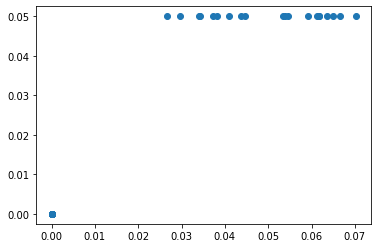

In [ ]:
plt.scatter(solution['x'], np.concatenate([np.zeros(20), np.ones(20) / 20]))

In [ ]:
ranks_mnist

,logloss_val,model_name,AUC_val,accuracy_val,weights,logloss_test,AUC_test,accuracy_test
0,0.000498,SL,1.000000,1.0000,NA,0.012946,0.999988,0.9958
13,0.000569,CNN_11,1.000000,0.9999,0.0635143,0.016531,0.999982,0.9953
17,0.000471,CNN_1,1.000000,0.9999,0.0437779,0.016063,0.999985,0.9951
2,0.000415,CNN_2,1.000000,1.0000,0.053332,0.017275,0.999984,0.9949
7,0.000471,CNN_14,1.000000,1.0000,0.0446161,0.016631,0.999981,0.9949
26,0.000580,CNN_6,1.000000,0.9998,0.0545389,0.017323,0.999980,0.9948
24,0.000594,CNN_3,1.000000,0.9998,0.0342458,0.016823,0.999978,0.9947
28,0.000578,CNN_8,1.000000,0.9998,0.06131,0.017344,0.999982,0.9946
4,0.000567,CNN_5,1.000000,1.0000,0.02957,0.017164,0.999982,0.9946
9,0.000496,CNN_16,1.000000,1.0000,0.0408597,0.016940,0.999982,0.9946


In [ ]:
ranks_mnist.to_csv('/content/drive/MyDrive/data_papers/outputs/{}_SL_results.csv'.format(dataset), index=False)

Test13 logloss analysis

In [ ]:
ranks_train = ranks.copy(deep=True)

In [ ]:
ranks_train_val = ranks_train.merge(ranks[['logloss', 'model_name']], on=['model_name'])

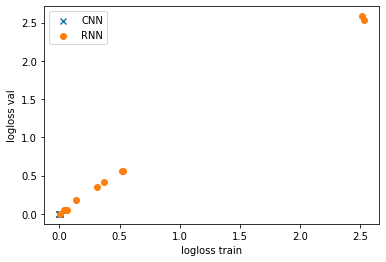

In [ ]:
plt.scatter(ranks_train_val_test['logloss_x'][:20], ranks_train_val_test['logloss_y'][:20], marker='x', label='CNN')
plt.scatter(ranks_train_val_test['logloss_x'][20:], ranks_train_val_test['logloss_y'][20:], marker='o', label='RNN')
plt.xlabel('logloss train')
plt.ylabel('logloss val')
plt.legend()
plt.show()

In [ ]:
ranks_train_val_test = ranks_train_val.merge(ranks[['logloss', 'model_name']], on=['model_name'])

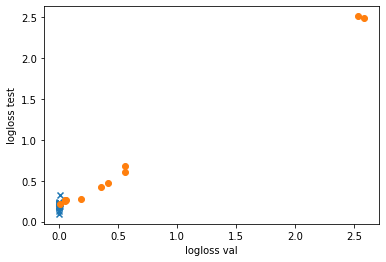

In [ ]:
plt.scatter(ranks_train_val_test['logloss_y'][:20], ranks_train_val_test['logloss'][:20], marker='x')
plt.scatter(ranks_train_val_test['logloss_y'][20:], ranks_train_val_test['logloss'][20:], marker='o')
plt.xlabel('logloss val')
plt.ylabel('logloss test')
plt.show()

**Saving** ***results***

In [ ]:
ranks.to_csv('/content/drive/MyDrive/data_papers/outputs/{}_{}_{}models.csv'.format(dataset, data_flag, num_models), index=False)

**Using CVXPY to solve optimization (works only for small datasets)**

In [ ]:
import cvxpy as cp

In [ ]:
weights = cp.Variable(num_models)
probs = sum((tr_list[i] * weights[i] for i in range(num_models)))
log_likelihood = cp.sum(cp.sum(cp.multiply(y_tr, cp.log(probs)), axis=1))
constraints = [0. <= weights, weights <= 1., cp.sum(weights) == 1.]
problem = cp.Problem(cp.Maximize(log_likelihood / train_size), constraints)

In [ ]:
# The optimal objective value is returned by `prob.solve()`.
result = problem.solve()
# The optimal value for x is stored in `x.value`.
print(weights.value)

SolverError: ignored

In [ ]:
np.round(weights.value, 1)

array([-0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.])

In [ ]:
super_learner(weights.value, val_list, y_val)

9.154136327307636e-05

## Ensemble of CNNs

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from PIL import Image
from torchvision import transforms, datasets

import sys
import os
import math
import random
import torch.optim as optim
from torchsummary import summary

In [ ]:
class ModelM3(nn.Module):
    def __init__(self):
        super(ModelM3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, bias=False)       # output becomes 26x26
        self.conv1_bn = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 48, 3, bias=False)      # output becomes 24x24
        self.conv2_bn = nn.BatchNorm2d(48)
        self.conv3 = nn.Conv2d(48, 64, 3, bias=False)      # output becomes 22x22
        self.conv3_bn = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 80, 3, bias=False)      # output becomes 20x20
        self.conv4_bn = nn.BatchNorm2d(80)
        self.conv5 = nn.Conv2d(80, 96, 3, bias=False)      # output becomes 18x18
        self.conv5_bn = nn.BatchNorm2d(96)
        self.conv6 = nn.Conv2d(96, 112, 3, bias=False)     # output becomes 16x16
        self.conv6_bn = nn.BatchNorm2d(112)
        self.conv7 = nn.Conv2d(112, 128, 3, bias=False)    # output becomes 14x14
        self.conv7_bn = nn.BatchNorm2d(128)
        self.conv8 = nn.Conv2d(128, 144, 3, bias=False)    # output becomes 12x12
        self.conv8_bn = nn.BatchNorm2d(144)
        self.conv9 = nn.Conv2d(144, 160, 3, bias=False)    # output becomes 10x10
        self.conv9_bn = nn.BatchNorm2d(160)
        self.conv10 = nn.Conv2d(160, 176, 3, bias=False)   # output becomes 8x8
        self.conv10_bn = nn.BatchNorm2d(176)
        self.fc1 = nn.Linear(11264, 10, bias=False)
        self.fc1_bn = nn.BatchNorm1d(10)
    def get_logits(self, x):
        x = (x - 0.5) * 2.0
        conv1 = F.relu(self.conv1_bn(self.conv1(x)))
        conv2 = F.relu(self.conv2_bn(self.conv2(conv1)))
        conv3 = F.relu(self.conv3_bn(self.conv3(conv2)))
        conv4 = F.relu(self.conv4_bn(self.conv4(conv3)))
        conv5 = F.relu(self.conv5_bn(self.conv5(conv4)))
        conv6 = F.relu(self.conv6_bn(self.conv6(conv5)))
        conv7 = F.relu(self.conv7_bn(self.conv7(conv6)))
        conv8 = F.relu(self.conv8_bn(self.conv8(conv7)))
        conv9 = F.relu(self.conv9_bn(self.conv9(conv8)))
        conv10 = F.relu(self.conv10_bn(self.conv10(conv9)))
        flat1 = torch.flatten(conv10.permute(0, 2, 3, 1), 1)
        logits = self.fc1_bn(self.fc1(flat1))
        return logits
    def forward(self, x):
        logits = self.get_logits(x)
        return F.log_softmax(logits, dim=1)

class ModelM5(nn.Module):
    def __init__(self):
        super(ModelM5, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, bias=False)
        self.conv1_bn = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 5, bias=False)
        self.conv2_bn = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 96, 5, bias=False)
        self.conv3_bn = nn.BatchNorm2d(96)
        self.conv4 = nn.Conv2d(96, 128, 5, bias=False)
        self.conv4_bn = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 160, 5, bias=False)
        self.conv5_bn = nn.BatchNorm2d(160)
        self.fc1 = nn.Linear(10240, 10, bias=False)
        self.fc1_bn = nn.BatchNorm1d(10)
    def get_logits(self, x):
        x = (x - 0.5) * 2.0
        conv1 = F.relu(self.conv1_bn(self.conv1(x)))
        conv2 = F.relu(self.conv2_bn(self.conv2(conv1)))
        conv3 = F.relu(self.conv3_bn(self.conv3(conv2)))
        conv4 = F.relu(self.conv4_bn(self.conv4(conv3)))
        conv5 = F.relu(self.conv5_bn(self.conv5(conv4)))
        flat5 = torch.flatten(conv5.permute(0, 2, 3, 1), 1)
        logits = self.fc1_bn(self.fc1(flat5))
        return logits
    def forward(self, x):
        logits = self.get_logits(x)
        return F.log_softmax(logits, dim=1)

class ModelM7(nn.Module):
    def __init__(self):
        super(ModelM7, self).__init__()
        self.conv1 = nn.Conv2d(1, 48, 7, bias=False)    # output becomes 22x22
        self.conv1_bn = nn.BatchNorm2d(48)
        self.conv2 = nn.Conv2d(48, 96, 7, bias=False)   # output becomes 16x16
        self.conv2_bn = nn.BatchNorm2d(96)
        self.conv3 = nn.Conv2d(96, 144, 7, bias=False)  # output becomes 10x10
        self.conv3_bn = nn.BatchNorm2d(144)
        self.conv4 = nn.Conv2d(144, 192, 7, bias=False) # output becomes 4x4
        self.conv4_bn = nn.BatchNorm2d(192)
        self.fc1 = nn.Linear(3072, 10, bias=False)
        self.fc1_bn = nn.BatchNorm1d(10)
    def get_logits(self, x):
        x = (x - 0.5) * 2.0
        conv1 = F.relu(self.conv1_bn(self.conv1(x)))
        conv2 = F.relu(self.conv2_bn(self.conv2(conv1)))
        conv3 = F.relu(self.conv3_bn(self.conv3(conv2)))
        conv4 = F.relu(self.conv4_bn(self.conv4(conv3)))
        flat1 = torch.flatten(conv4.permute(0, 2, 3, 1), 1)
        logits = self.fc1_bn(self.fc1(flat1))
        return logits
    def forward(self, x):
        logits = self.get_logits(x)
        return F.log_softmax(logits, dim=1)

class MnistDataset(torch.utils.data.Dataset):
    def __init__(self, training=True, validation=False, transform=None):
        if training==True:
            f = open('/content/drive/MyDrive/data_papers/ensemble/train-images-idx3-ubyte', 'rb')
            xs = np.array(np.frombuffer(f.read(), np.uint8, offset=16))
            f.close()
            f = open('/content/drive/MyDrive/data_papers/ensemble/train-labels-idx1-ubyte', 'rb')
            ys = np.array(np.frombuffer(f.read(), np.uint8, offset=8))
            f.close()
        else:
            f = open('/content/drive/MyDrive/data_papers/ensemble/t10k-images-idx3-ubyte', 'rb')
            xs = np.array(np.frombuffer(f.read(), np.uint8, offset=16))
            f.close()
            f = open('/content/drive/MyDrive/data_papers/ensemble/t10k-labels-idx1-ubyte', 'rb')
            ys = np.array(np.frombuffer(f.read(), np.uint8, offset=8))
            f.close()
        xs = np.reshape(xs, (-1, 28, 28, 1)).astype(np.float32)
        ys = ys.astype(np.int)
        if (validation == False) and (training==True):
            xs = xs[:50000]
            ys = ys[:50000]
        elif (validation == True) and (training==True):
            xs = xs[50000:]
            ys = ys[50000:]
        else:
            pass
        self.x_data = xs
        self.y_data = ys
        self.transform = transform

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = Image.fromarray(self.x_data[idx].reshape(28, 28))
        y = torch.tensor(np.array(self.y_data[idx]))
        if self.transform:
            x = self.transform(x)
        x = transforms.ToTensor()(np.array(x)/255)
        return x, y

In [ ]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"


# enable GPU usage ------------------------------------------------------------#
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
if use_cuda == False:
    print("WARNING: CPU will be used for training.")
    exit(0)

In [ ]:
# data loader -----------------------------------------------------------------#
val_dataset = MnistDataset(training=True, validation=True, transform=None)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=100, shuffle=False)
#test_dataset = MnistDataset(training=False, validation=True, transform=None)
#test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)
p_kernel_size = 5

# model selection -------------------------------------------------------------#
if(p_kernel_size == 3):
    model1 = ModelM3().to(device)
elif(p_kernel_size == 5):
    model1 = ModelM5().to(device)
elif(p_kernel_size == 7):
    model1 = ModelM7().to(device)

model1.load_state_dict(torch.load("/content/drive/MyDrive/data_papers/ensemble/logs/M5/model000.pth"))

<All keys matched successfully>

In [ ]:
aa = evaluate(model1, val_loader)

In [ ]:
DIRS = ['M5', 'M3', 'M7', 'M5_NoTransform', 'M5_NoTransform_NoEMA']

In [ ]:
def evaluate(model, data_loader, device):
    
    model.eval()
    test_loss = 0
    correct = 0
    total_pred = []
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            softmax_output = torch.exp(model(data))
            total_pred.append(softmax_output.cpu().numpy())
    
    return np.concatenate(total_pred)

def target_loader(validation=True):
    
    # data loader -----------------------------------------------------------------#
    if validation:
        dataset = MnistDataset(training=True, validation=True, transform=None)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=False)
    else:
        dataset = MnistDataset(training=False, validation=True, transform=None)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=False)
    
    targets = np.zeros(0)
    for _, target in data_loader:
        targets = np.append(targets, target)
    
    return targets
    

def runner(dirs, validation_set=True):

    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"]="0"

    # enable GPU usage ------------------------------------------------------------#
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    if use_cuda == False:
        print("WARNING: CPU will be used for training.")
        exit(0) 
    
    # data loader -----------------------------------------------------------------#
    if validation_set:
        dataset = MnistDataset(training=True, validation=True, transform=None)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=False)
    else:
        dataset = MnistDataset(training=False, validation=True, transform=None)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=False)

    PATH = "/content/drive/MyDrive/data_papers/ensemble/logs/{}"
    model_softmax_probs = []

    for dir in dirs:
        list_of_models = [x for x in os.listdir(PATH.format(dir)) if '.pth' in x]
        
        for model in list_of_models:
            p_kernel_size = int(dir[1]) 
        
            # model selection -------------------------------------------------------------#
            if(p_kernel_size == 3):
                model1 = ModelM3().to(device)
            elif(p_kernel_size == 5):
                model1 = ModelM5().to(device)
            elif(p_kernel_size == 7):
                model1 = ModelM7().to(device)
                
            model1.load_state_dict(torch.load(os.path.join(PATH.format(dir), model)))
            softmax_probs = evaluate(model1, data_loader, device)
            model_softmax_probs.append(softmax_probs)
        
    return model_softmax_probs

In [ ]:
y_val = target_loader(validation=True)
y_tst = target_loader(validation=False)


In [ ]:
val_list = runner(dirs=DIRS, validation_set=True)
tst_list = runner(dirs=DIRS, validation_set=False)

In [ ]:
len(val_list)

51